In [45]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
#Load the training data
col_names = ['A', 'B', 'deltaI', 'deltaR', 'E', 'k']
peak_names = ['peak1', 'peak2', 'peak3', 'peak4', 'peak5']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4', 'loc5']
width_names = ['width1', 'width2', 'width3','width4', 'width5']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4', 'prom5']
col_names = col_names + peak_names + locs_names + width_names + prom_names

data = pd.read_csv('Training_Data/Line_Cut/LineCutTrainingData052118_fixedfit.csv', header = None, names = col_names)

#The peak information columns have zeros when there weren't 5 peaks

data.head()

,A,B,deltaI,deltaR,E,k,peak1,peak2,peak3,peak4,...,width1,width2,width3,width4,width5,prom1,prom2,prom3,prom4,prom5
0,-0.38805,-0.22596,0.81472,-0.14798,-0.4,0.06469,0.99666,0.31311,0.19045,0.17845,...,1.4630,46.800,50.281,32.218,0.000,1.27010,0.53509,0.37420,0.15110,0.00000
1,-0.33357,-0.16418,0.81472,-0.14798,-0.3,0.12292,0.82062,0.25860,0.15841,0.13729,...,1.5461,24.827,26.035,27.184,26.446,1.28980,0.45609,0.30073,0.26413,0.20762
2,-0.30657,-0.15064,0.81472,-0.14798,-0.2,0.16228,0.71396,0.23300,0.14533,0.12049,...,1.4174,18.767,19.882,20.103,20.188,1.12150,0.41003,0.27792,0.22411,0.18490
3,-0.28211,-0.14453,0.81472,-0.14798,-0.1,0.19463,0.62981,0.21673,0.13800,0.10512,...,1.3712,15.619,16.632,16.654,17.221,0.99603,0.37978,0.26048,0.20270,0.18805
4,-0.26310,-0.13547,0.81472,-0.14798,0.0,0.22312,0.55621,0.20383,0.13048,0.10268,...,1.3342,13.635,14.398,14.818,14.560,0.87763,0.35828,0.24145,0.19974,0.16361


## Creating the various test, train, data sets

In [60]:
target = data[['deltaI', 'deltaR']]

train1 = data[['A', 'B', 'E', 'k']]
train2 = data[['A', 'B', 'E']]

##Just the entries with E = -0.4
#train_E_04 = train1[train1['E']==-0.4]
#target_E_04 = target[train1['E']==-0.4]
#train_E_04_a = train_E_04[['A', 'B']] 

#Making a copy of the data frame
df1 = data

columns1 = df1.columns
X1 = df1.drop(columns1[2:4], axis = 1) #everything except target
X2 = X1.drop(columns1[6:], axis = 1) # no additional peak info
X3 = X2.drop(columns1[4:6], axis = 1) # no E, k

Y1 = df1[['deltaR']]
Y2 = df1[['deltaI']]
Y3 = pd.DataFrame.join(Y1,Y2)

#Making another copy of the data frame
df2 = df1

n1 = int(len(df1['deltaR'])/9)

#Initializing a new dataframe to use the average peaks, prominences and widths as features instead of each one
new_df = pd.DataFrame(np.zeros([n1,7]), columns = ['deltaI', 'deltaR', 'avgA', 'avgB', 'avgPeak', 'avgWidth', 'avgProm'])
for i in range(1,n1+1):
        
        temp_df = df2[9*(i-1):9*i]
        columns = temp_df.columns
        new_df['deltaI'][i-1] = temp_df['deltaI'].mean()
        new_df['deltaR'][i-1] = temp_df['deltaR'].mean()
        
        new_df['avgA'][i-1] = temp_df['A'].mean()
        new_df['avgB'][i-1] = temp_df['B'].mean()
        
        new_df['avgPeak'][i-1] = temp_df[columns[6:11]][temp_df[columns[6:11]]>0].mean().mean()
        
        new_df['avgWidth'][i-1] = temp_df[columns[11:16]][temp_df[columns[11:16]]>0].mean().mean()
        
        new_df['avgProm'][i-1] = temp_df[columns[16:21]][temp_df[columns[16:21]]>0].mean().mean()
        
        
#new_df.head()
new_columns = new_df.columns
X_new_df = new_df.drop(new_columns[0:2], axis=1)
Y_new_df = new_df.drop(new_columns[2:], axis = 1)


#### Splitting each dataset in the previous cell into train and test

In [61]:
#Random state
rs = 42
#Test size
ts1 = 0.3

X_a_train, X_a_test, Y_a_train, Y_a_test = train_test_split(train1, target, test_size = ts1, random_state = rs)

X_b_train, X_b_test, Y_b_train, Y_b_test = train_test_split(train2, target, test_size = ts1, random_state = rs)

#Splitting X1, Y1 into train and test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs)

#Splitting X2, Y2 into train and test
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs)

#Splitting X3, Y3 into train and test
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs)

#Splitting X_new_df, Y_new_df into train and test
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new_df, Y_new_df, test_size = ts1, random_state = rs)



## Making models

#### Using linear regression from scikit-learn on the minimal data set (only A, B, E, k as features)

Coefficients: 
 [[ 0.02517025  2.59587981  0.67109299 -2.962225  ]
 [ 3.78402461 -0.54908394  0.21840976 -2.62816891]]
Mean squared error: 0.07
Variance score: 0.467


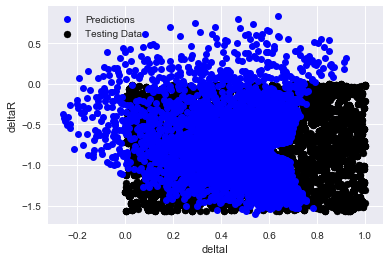

In [62]:
import pylab
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg1 = reg.fit(X_a_train, Y_a_train)

#Make predictions using the testing set
y_pred1 = reg1.predict(X_a_test)

# The coefficients
print('Coefficients: \n', reg1.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_a_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_a_test, y_pred1))

# Plot outputs
plt.scatter(Y_a_test['deltaI'], Y_a_test['deltaR'],  color=['black'], label = 'Testing Data')
plt.plot(y_pred1[:,0], y_pred1[:,1], 'bo', label = 'Predictions')

# add labels to figure
plt.xlabel('deltaI')
plt.ylabel('deltaR')
pylab.legend(loc='upper left')

In [63]:
iterations = len(Y_a_test['deltaR']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
SSres_1 = 0 # initializes sum of residuals squared 
for i in range (0,iterations): # for every dot/point
    y_pred1_col = y_pred1[i,1] #get the y value of the line at a specific x value i 
    deltaR = Y_a_test['deltaR'] # get ys of all dots/points 
    deltaR = deltaR.values # take out the indexing, data types, and names
    deltaR = deltaR[i] # get the y value of the dot/point at specfic x value i 
    diff = y_pred1_col - deltaR # find the difference in height 
    diff_squared = (diff)**2 # square the difference 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    SSres_1 = diff_squared + SSres_1 # add squared residual to sum 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for ys (deltaRs):', round(residual_average,3)) # display average of residuals 

min1 = min(Y_a_test['deltaR']) # find min y 
max1 = max(Y_a_test['deltaR']) # find max y 
range_Y_a_test = min1 + max1 # calculate range 
print('Range:' , round(range_Y_a_test,3)) # print range 
residual_percent_range_Y_a_test = round(((residual_average/abs(range_Y_a_test))*100),3) # calculate what percent residual is of range
print('Y Residual is this percent of range', residual_percent_range_Y_a_test, '%') # display percent 


SStot_1 = np.var(Y_a_test['deltaR']) # calculate variance/total sum of squares 
SSres_1a = SSres_1/iterations # calculate sum of squares of residuals for ys 
R2_1 = round(1 - (SSres_1a/SStot_1),3) # calculate R squared value for ys 
print('Y (deltaR) variance', R2_1) # print r squared value for ys 
################################################################################
iterations = len(Y_a_test['deltaI']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
SSres_1x = 0 # initializes sum of residuals squared 
for i in range (0,iterations): # for every dot/point
    y_pred1_row = y_pred1[i,0] #get the y value of the line at a specific x value i 
    deltaI = Y_a_test['deltaI'] # get ys of all dots/points 
    deltaI = deltaI.values # take out the indexing, data types, and names
    deltaI = deltaI[i] # get the y value of the dot/point at specfic x value i 
    diff = y_pred1_row - deltaI # find the difference in height 
    diff_squared = (diff)**2 # square the difference 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    SSres_1x = diff_squared + SSres_1x # add squared residual to sum 
residual_averagex = residual_sum/iterations # find the average of the residuals 
print(' ')
print('The average residual for ys (deltaRs):', round(residual_averagex,3)) # display average of residuals 

min1x = min(Y_a_test['deltaI']) # find min x
max1x = max(Y_a_test['deltaI']) # find max x 
range_Y_a_testx = min1x + max1x # calculate range 
print('Domain:' , round(range_Y_a_testx,3)) # print range 
residual_percent_range_Y_a_testx = round(((residual_averagex/abs(range_Y_a_testx))*100),3) # calculate what percent residual is of domain
print('X Residual is this percent of range', residual_percent_range_Y_a_testx, '%') # display percent 


SStot_1x = np.var(Y_a_test['deltaI']) # calculate variance/total sum of squares 
SSres_1xa = SSres_1x/iterations # calculate sum of squares of residuals for xs 
R2_1x = round(1 - (SSres_1xa/SStot_1x),3) # calculate R squared value for xs 
print('X (deltaI) variance', R2_1x) # print r squared value for xs 

The average residual for ys (deltaRs): 0.218
Range: -1.571
Y Residual is this percent of range 13.893 %
Y (deltaR) variance 0.614
 
The average residual for ys (deltaRs): 0.19
Domain: 1.0
X Residual is this percent of range 19.016 %
X (deltaI) variance 0.319


#### Using linear regression from scikit-learn on the data set with only A, B and E as features (no k). 

Coefficients: 
 [[-0.02598818  2.4676868  -0.20649517]
 [ 3.73863541 -0.66282037 -0.56021102]]
Mean squared error: 0.07
Variance score: 0.46
 
The average residual for ys: 0.219
Range: -1.571
Y Residual is this percent of range 13.916 %
Y (deltaR) variance 0.609
 
The average residual for ys (deltaRs): 0.19
Domain: 1.0
X Residual is this percent of range 19.016 %
X (deltaI) variance 0.319


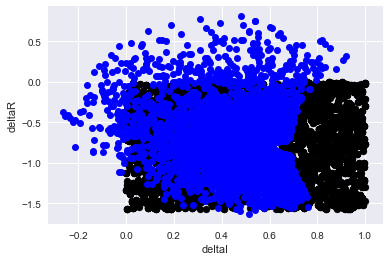

In [64]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg2 = reg.fit(X_b_train, Y_b_train)

#Make predictions using the testing set
y_pred2 = reg2.predict(X_b_test)

# The coefficients
print('Coefficients: \n', reg2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_b_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_b_test, y_pred2))

# Plot outputs
plt.scatter(Y_b_test['deltaI'], Y_b_test['deltaR'],  color=['black'])
plt.plot(y_pred2[:,0], y_pred2[:,1], 'bo')

# add labels to figure
plt.xlabel('deltaI')
plt.ylabel('deltaR')
###############################################

i = 0 # resetting i 
iterations = len(Y_b_test['deltaR']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
SSres_2 = 0
for i in range (0,iterations): # for every dot/point
    y_pred2_col = y_pred2[i,1] #get the y value of the line at a specific x value i 
    deltaR = Y_b_test['deltaR'] # get ys of all dots/points 
    deltaR = deltaR.values # take out the indexing, data types, and names
    deltaR = deltaR[i] # get the y value of the dot/point at specfic x value i 
    diff = y_pred2_col - deltaR # find the difference in height 
    diff_squared = (diff)**2 # square the difference 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    SSres_2 = diff_squared + SSres_2 # sum the squared residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print(' ')
print('The average residual for ys:', round(residual_average,3)) # display average of residuals 

min2 = min(Y_b_test['deltaR'])
max2 = max(Y_b_test['deltaR'])
range_Y_b_test = min2 + max2
print('Range:' , round(range_Y_b_test,3))
residual_percent_range_Y_b_test = round(((residual_average/abs(range_Y_b_test))*100),3)
print('Y Residual is this percent of range', residual_percent_range_Y_b_test, '%')

SStot_2 = np.var(Y_b_test['deltaR']) # calculate variance/total sum of squares 
SSres_2a = SSres_2/iterations # calculate sum of squares of residuals for ys 
R2_2= round(1 - (SSres_2a/SStot_2),3) # calculate R squared value for ys 
print('Y (deltaR) variance', R2_2) # print r squared value for ys 

################################################################################
iterations = len(Y_b_test['deltaI']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
SSres_2x = 0 # initializes sum of residuals squared 
for i in range (0,iterations): # for every dot/point
    y_pred1_row = y_pred1[i,0] #get the y value of the line at a specific x value i 
    deltaI = Y_b_test['deltaI'] # get ys of all dots/points 
    deltaI = deltaI.values # take out the indexing, data types, and names
    deltaI = deltaI[i] # get the y value of the dot/point at specfic x value i 
    diff = y_pred1_row - deltaI # find the difference in height 
    diff_squared = (diff)**2 # square the difference 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    SSres_2x = diff_squared + SSres_2x # add squared residual to sum 
residual_average2x = residual_sum/iterations # find the average of the residuals 
print(' ')
print('The average residual for ys (deltaRs):', round(residual_average2x,3)) # display average of residuals 

min2x = min(Y_b_test['deltaI']) # find min x
max2x = max(Y_b_test['deltaI']) # find max x 
range_Y_b_testx = min2x + max2x # calculate range 
print('Domain:' , round(range_Y_b_testx,3)) # print range 
residual_percent_range_Y_b_testx = round(((residual_average2x/abs(range_Y_b_testx))*100),3) # calculate what percent residual is of domain
print('X Residual is this percent of range', residual_percent_range_Y_b_testx, '%') # display percent 


SStot_2x = np.var(Y_b_test['deltaI']) # calculate variance/total sum of squares 
SSres_2xa = SSres_2x/iterations # calculate sum of squares of residuals for xs 
R2_2x = round(1 - (SSres_2xa/SStot_2x),3) # calculate R squared value for xs 
print('X (deltaI) variance', R2_2x) # print r squared value for xs 

Coefficients: 
 [[-0.30423947  0.07168289 -0.57917628 -0.0606858   0.23967096]
 [ 4.0122663   0.69136218 -2.62299964  0.29092536 -2.66989643]]
Mean squared error: 0.04
Variance score: 0.71
length 750
 
The average Y residual: 0.151
Range: -1.576
Y Residual is this percent of range 9.55 %
Y (deltaR) variance 0.789
 
The average X residual (deltaIs): 0.138
Domain: 1.0
X Residual is this percent of range 13.814 %
X (deltaI) variance 0.638


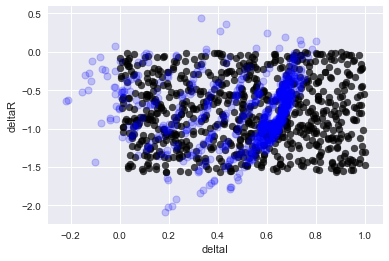

In [67]:
# new = using averages of columns 
#Initialize and fit model to training data with new columns
reg = linear_model.LinearRegression()
reg_new_lm = reg.fit(X_new_train, Y_new_train)

#Make predictions using the testing set
y_pred_new_lm = reg_new_lm.predict(X_new_test)

# The coefficients
print('Coefficients: \n', reg_new_lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_new_test, y_pred_new_lm))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_new_test, y_pred_new_lm))

# Plot outputs
plt.scatter(Y_new_test['deltaI'], Y_new_test['deltaR'],  color=['black'], alpha = 0.7)
plt.scatter(y_pred_new_lm[:,0], y_pred_new_lm[:,1], color='blue', linewidth=1, alpha = 0.2)
# add labels to figure
plt.xlabel('deltaI')
plt.ylabel('deltaR')

#############################################################################
print('length', len(Y_new_test['deltaR']))
i = 0 # resetting i 
iterations = len(Y_new_test['deltaR']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
SSres_new = 0 # initialize sum of squared residuals 
for i in range (0,iterations): # for every dot/point
    y_pred_new_lm_col = y_pred_new_lm[i,1] #get the y value of the line at a specific x value i 
    deltaR = Y_new_test['deltaR'] # get ys of all dots/points 
    deltaR = deltaR.values # take out the indexing, data types, and names
    deltaR = deltaR[i] # get the y value of the dot/point at specfic x value i 
    diff = y_pred_new_lm_col - deltaR # find the difference in height 
    diff_squared = (diff)**2 # square the difference 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    SSres_new = diff_squared + SSres_new # sum the squared differences 
residual_average = residual_sum/iterations # find the average of the residuals 
print(' ')
print('The average Y residual:', round(residual_average,3)) # display average of residuals 

min3 = min(Y_new_test['deltaR'])
max3 = max(Y_new_test['deltaR'])
range_Y_new_test = min3 + max3
print('Range:' , round(range_Y_new_test,3))
residual_percent_range_Y_new_test = round(((residual_average/abs(range_Y_new_test))*100),3)
print('Y Residual is this percent of range', residual_percent_range_Y_new_test, '%')

SStot_new = np.var(Y_new_test['deltaR']) # calculate variance/total sum of squares 
SSres_newa = SSres_new/iterations # calculate sum of squares of residuals for ys 
R2_new= round(1 - (SSres_newa/SStot_new),3) # calculate R squared value for ys 
print('Y (deltaR) variance', R2_new) # print r squared value for ys 

################################################################################
iterations = len(Y_new_test['deltaI']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
SSres_newx = 0 # initializes sum of residuals squared 
for i in range (0,iterations): # for every dot/point
    y_pred_new_lm_row = y_pred_new_lm[i,0] #get the y value of the line at a specific x value i 
    deltaI = Y_new_test['deltaI'] # get ys of all dots/points 
    deltaI = deltaI.values # take out the indexing, data types, and names
    deltaI = deltaI[i] # get the y value of the dot/point at specfic x value i 
    diff = y_pred_new_lm_row - deltaI # find the difference in height 
    diff_squared = (diff)**2 # square the difference 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    SSres_newx = diff_squared + SSres_newx # add squared residual to sum 
residual_averagenewx = residual_sum/iterations # find the average of the residuals 
print(' ')
print('The average X residual (deltaIs):', round(residual_averagenewx,3)) # display average of residuals 

minnewx = min(Y_new_test['deltaI']) # find min x
maxnewx = max(Y_new_test['deltaI']) # find max x 
range_Y_new_testx = minnewx + maxnewx # calculate range 
print('Domain:' , round(range_Y_new_testx,3)) # print range 
residual_percent_range_Y_new_testx = round(((residual_averagenewx/abs(range_Y_new_testx))*100),3) # calculate what percent residual is of domain
print('X Residual is this percent of range', residual_percent_range_Y_new_testx, '%') # display percent 


SStot_newx = np.var(Y_new_test['deltaI']) # calculate variance/total sum of squares 
SSres_newxa = SSres_newx/iterations # calculate sum of squares of residuals for xs 
R2_newx = round(1 - (SSres_newxa/SStot_newx),3) # calculate R squared value for xs 
print('X (deltaI) variance', R2_newx) # print r squared value for xs 

# Using statsmodels

In [70]:
#Initialize and fit OLS model for deltaR 
model = sm.OLS(Y1_train, X1_train)
results = model.fit()

#Make predictions on testing data
predictions = results.predict(X1_test) # make the predictions by the model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaR   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.163e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:50   Log-Likelihood:                 2494.4
No. Observations:               15750   AIC:                            -4941.
Df Residuals:                   15726   BIC:                            -4757.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -2.5357      0.125    -20.334      0.000      -2.780      -2.291
B             -5.2744      0.100    -52.673      0.000      -5.471      -5.078
E             -0.4775      0.048     -9.898      0.000      -0.572      -0.383
k              1.2470      0.097     12.841      0.000       1.057       1.437
peak1         -0.1295      0.013     -9.699      0.000      -0.156      -0.103
peak2         21.2435      2.496      8.511      0.000      16.351      26.136
peak3          5.7753      2.207      2.617      0.009       1.450      10.100
peak4        -26.8676      1.784    -15.059      0.000     -30.365     -23.371
peak5        -22.2982      1.598    -13.956      0.000     -25.430     -19.166
loc1           0.0016      0.005      0.296      0.768      -0.009       0.012
loc2          -0.0373      0.005     -7.695      0.000      -0.047      -0.028
loc3          -0.0215      0.005     -4.523      0.000      -0.031      -0.012
loc4           0.0162      0.001     11.003      0.000       0.013       0.019
loc5           0.0021      0.003      0.700      0.484      -0.004       0.008
width1         0.0288      0.010      3.007      0.003       0.010       0.048
width2         0.1675      0.028      5.925      0.000       0.112       0.223
width3         0.0282      0.018      1.578      0.115      -0.007       0.063
width4        -0.1633      0.010    -16.796      0.000      -0.182      -0.144
width5         0.0327      0.024      1.381      0.167      -0.014       0.079
prom1          0.0828      0.013      6.365      0.000       0.057       0.108
prom2        -17.7496      1.883     -9.428      0.000     -21.440     -14.060
prom3         -3.1224      1.332     -2.343      0.019      -5.734      -0.511
prom4         16.2630      1.123     14.486      0.000      14.062      18.464
prom5          5.2102      0.825      6.312      0.000       3.592       6.828
==============================================================================
Omnibus:                      247.072   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.894
Skew:                           0.176   Prob(JB):                     7.86e-81
Kurtosis:                       3.662   Cond. No.                     3.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The average residual: [0.15938498]
Residual is this percent of range 5.054 %
Variance score: 0.78


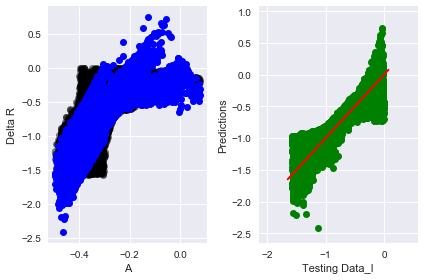

In [101]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X1_test['A'],Y1_test, 'ko', alpha = 0.5)
ax.plot(X1_test['A'], predictions,'bo')
plt.xlabel('A')
plt.ylabel('Delta R')

ax = pylab.subplot(122)
ax.plot(Y1_test,predictions, 'go')
xmin,xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-1,xmax+1)
plt.xlabel('Testing Data_I')
plt.ylabel('Predictions')
plt.margins(0.5,1)
plt.tight_layout()

i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i] # get y value at specific i 
    predictions_ys = predictions # get ys of all dots/points
    predictions_ys = predictions_ys.values # take out the indexing, data types, and names
    predictions_y = predictions_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predictions_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY1 = min(Y1_test_ys)
maxY1 = max(Y1_test_ys)
minp = min(predictions)
maxp = max(predictions)
#print('minY1', minY1, 'maxY1', maxY1)
#print('minp', minp, 'maxp', maxp)
rangeY1 = minY1 + maxY1 
rangep = minp-maxp
#print('rangeY1', rangeY1)
#print('rangep', rangep)
residual_percent_rangep = (residual_average/abs(rangep))*100
print('Residual is this percent of range', round(residual_percent_rangep[0],3), '%')
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_test, predictions))

In [72]:
#Initialize and fit OLS model for deltaI 
model_I = sm.OLS(Y2_train, X1_train)
results_I = model_I.fit()

#Make predictions on testing data
predictions_I = results_I.predict(X1_test) # make the predictions by the model

results_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     5047.
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:52   Log-Likelihood:                 3308.2
No. Observations:               15750   AIC:                            -6568.
Df Residuals:                   15726   BIC:                            -6384.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -4.2288      0.118    -35.709      0.000      -4.461      -3.997
B             -1.5202      0.095    -15.987      0.000      -1.707      -1.334
E             -0.6278      0.046    -13.705      0.000      -0.718      -0.538
k              4.0337      0.092     43.739      0.000       3.853       4.214
peak1         -0.1571      0.013    -12.386      0.000      -0.182      -0.132
peak2        -27.4209      2.370    -11.568      0.000     -32.067     -22.775
peak3          3.7254      2.095      1.778      0.075      -0.382       7.833
peak4        -23.2166      1.694    -13.703      0.000     -26.538     -19.896
peak5        -12.0479      1.517     -7.940      0.000     -15.022      -9.074
loc1          -0.2376      0.005    -46.448      0.000      -0.248      -0.228
loc2           0.0315      0.005      6.838      0.000       0.022       0.040
loc3           0.0194      0.005      4.299      0.000       0.011       0.028
loc4           0.0159      0.001     11.390      0.000       0.013       0.019
loc5          -0.0043      0.003     -1.540      0.124      -0.010       0.001
width1         0.1186      0.009     13.044      0.000       0.101       0.136
width2        -0.0798      0.027     -2.972      0.003      -0.132      -0.027
width3         0.0046      0.017      0.271      0.786      -0.029       0.038
width4        -0.1311      0.009    -14.198      0.000      -0.149      -0.113
width5         0.0700      0.022      3.111      0.002       0.026       0.114
prom1          0.0738      0.012      5.975      0.000       0.050       0.098
prom2         16.2746      1.788      9.103      0.000      12.770      19.779
prom3         -5.1367      1.265     -4.060      0.000      -7.617      -2.657
prom4         10.7953      1.066     10.126      0.000       8.706      12.885
prom5          0.6291      0.784      0.803      0.422      -0.907       2.166
==============================================================================
Omnibus:                      316.239   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.849
Skew:                          -0.328   Prob(JB):                     1.31e-75
Kurtosis:                       3.309   Cond. No.                     3.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The average residual: [0.15594224]
Residual is this percent of range 5.102 %
Variance score: 0.55


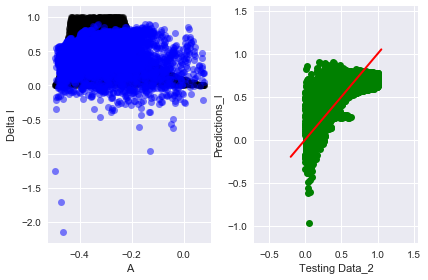

In [73]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X1_test['A'],Y2_test, 'ko', alpha =0.5)
ax.plot(X1_test['A'], predictions_I,'bo', alpha = 0.5)
plt.xlabel('A')
plt.ylabel('Delta I')

ax = pylab.subplot(122)
ax.plot(Y2_test,predictions_I, 'go')
xmin, xmax = plt.xlim()
xmin = -0.2
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_2')
plt.ylabel('Predictions_I')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-1,xmax+0.5)

i = 0 # resetting i 
iterations = len(Y2_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y2_test_ys = Y2_test # get ys of testing data 
    Y2_test_ys = Y2_test_ys.values # take out indexing, data types, names
    Y2_test_y = Y2_test_ys[i] # get y value at specific i 
    predictions_I_ys = predictions_I # get ys of all dots/points
    predictions_I_ys = predictions_I_ys.values # take out the indexing, data types, and names
    predictions_I_y = predictions_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y2_test_y - predictions_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY2 = min(Y2_test_ys)
maxY2 = max(Y2_test_ys)
minp_I = min(predictions_I)
maxp_I = max(predictions_I)
#print('minY2', minY2, 'maxY2', maxY2)
#print('minp_I', minp_I, 'maxp_I', maxp_I)
rangeY2 = minY2 + maxY2 
rangep_I = minp_I-maxp_I
#print('rangeY2', rangeY2)
#print('rangep_I', rangep_I)
residual_percent_rangep_I = (residual_average/abs(rangep_I))*100
print('Residual is this percent of range', round(residual_percent_rangep_I[0],3), '%')
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, predictions_I))

In [74]:
#Initialize and fit model for just deltaR using A, phi, E, k only
model2 = sm.OLS(Y1_train,X2_train)
results2 = model2.fit()

predictions2 = results2.predict(X2_test)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaR   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 3.544e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:53   Log-Likelihood:                -2450.5
No. Observations:               15750   AIC:                             4909.
Df Residuals:                   15746   BIC:                             4940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              3.6283      0.023    154.691      0.000       3.582       3.674
B             -0.8266      0.033    -24.807      0.000      -0.892      -0.761
E             -0.8398      0.021    -40.518      0.000      -0.880      -0.799
k              1.0289      0.047     21.889      0.000       0.937       1.121
==============================================================================
Omnibus:                        0.442   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.464
Skew:                           0.010   Prob(JB):                        0.793
Kurtosis:                       2.982   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The average residual: [0.21947773]
Residual is this percent of range 25.814 %
Variance score: 0.60


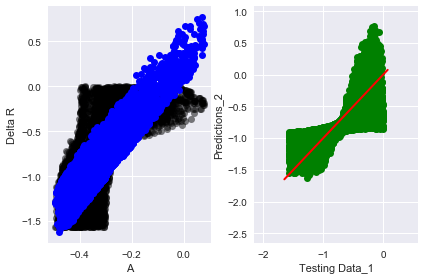

In [75]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X2_test['A'],Y1_test, 'ko', alpha = 0.5)
ax.plot(X2_test['A'], predictions2,'bo')
plt.xlabel('A')
plt.ylabel('Delta R')

ax = pylab.subplot(122)
ax.plot(Y1_test,predictions2, 'go')
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_1')
plt.ylabel('Predictions_2')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-1,xmax+1)

i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i] # get y value at specific i 
    predictions2_ys = predictions2 # get ys of all dots/points
    predictions2_ys = predictions2_ys.values # take out the indexing, data types, and names
    predictions2_y = predictions2_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predictions2_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY1 = min(Y1_test_ys)
maxY1 = max(Y1_test_ys)
minp2 = min(predictions2)
maxp2 = max(predictions2)
#print('minY1', minY1, 'maxY1', maxY1)
#print('minp2', minp2, 'maxp2', maxp2)
rangeY1 = minY1 + maxY1 
rangep2 = minp2+maxp2
#print('rangeY1', rangeY1)
#print('rangep2', rangep2)
residual_percent_rangep2 = (residual_average/abs(rangep2))*100
print('Residual is this percent of range', round(residual_percent_rangep2[0],3), '%')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_test, predictions2))

In [76]:
#Initialize and fit model for just deltaI using A, phi, E, k only
model2_I = sm.OLS(Y2_train,X2_train)
results2_I = model2_I.fit()

predictions2_I = results2_I.predict(X2_test)
results2_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 1.658e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:54   Log-Likelihood:                -729.99
No. Observations:               15750   AIC:                             1468.
Df Residuals:                   15746   BIC:                             1499.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -0.2660      0.021    -12.651      0.000      -0.307      -0.225
B              2.0770      0.030     69.524      0.000       2.018       2.136
E             -1.3072      0.019    -70.349      0.000      -1.344      -1.271
k              3.8746      0.042     91.947      0.000       3.792       3.957
==============================================================================
Omnibus:                      271.754   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.751
Skew:                          -0.290   Prob(JB):                     1.96e-58
Kurtosis:                       2.739   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The average residual: [0.20427675]
Residual is this percent of range 33.67 %
Variance score: 0.23


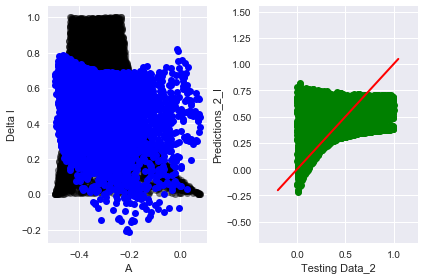

In [77]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X2_test['A'],Y2_test, 'ko', alpha =0.5)
ax.plot(X2_test['A'], predictions2_I,'bo')
plt.xlabel('A')
plt.ylabel('Delta I')

ax = pylab.subplot(122)
ax.plot(Y2_test,predictions2_I, 'go')
xmin, xmax = plt.xlim()
xmin = -0.2
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_2')
plt.ylabel('Predictions_2_I')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.2,xmax+0.2)
ax.set_ylim(xmin-0.5,xmax+0.5)

i = 0 # resetting i 
iterations = len(Y2_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y2_test_ys = Y2_test # get ys of testing data 
    Y2_test_ys = Y2_test_ys.values # take out indexing, data types, names
    Y2_test_y = Y2_test_ys[i] # get y value at specific i 
    predictions2_I_ys = predictions2_I # get ys of all dots/points
    predictions2_I_ys = predictions2_I_ys.values # take out the indexing, data types, and names
    predictions2_I_y = predictions2_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y2_test_y - predictions2_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY2 = min(Y2_test_ys)
maxY2 = max(Y2_test_ys)
minp2_I = min(predictions2_I)
maxp2_I = max(predictions2_I)
#print('minY2', minY2, 'maxY2', maxY2)
#print('minp2_I', minp2_I, 'maxp2_I', maxp2_I)
rangeY2 = minY2 + maxY2
rangep2_I = minp2_I+maxp2_I
#print('rangeY2', rangeY2)
#print('rangep2_I', rangep2_I)
residual_percent_rangep2_I = (residual_average/abs(rangep2_I))*100
print('Residual is this percent of range', round(residual_percent_rangep2_I[0],3), '%')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, predictions2_I))

In [78]:
#Initialize and fit model for just deltaR using A, phi only
model3 = sm.OLS(Y1_train,X3_train)
results3 = model3.fit()

predictions3 = results3.predict(X3_test)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaR   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 5.880e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:55   Log-Likelihood:                -3762.4
No. Observations:               15750   AIC:                             7529.
Df Residuals:                   15748   BIC:                             7544.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              3.1946      0.018    181.991      0.000       3.160       3.229
B             -1.2471      0.028    -44.177      0.000      -1.302      -1.192
==============================================================================
Omnibus:                      238.798   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.604
Skew:                           0.308   Prob(JB):                     6.30e-55
Kurtosis:                       2.988   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The average residual: [0.24407015]
Residual is this percent of range 12.69 %
Variance score: 0.53


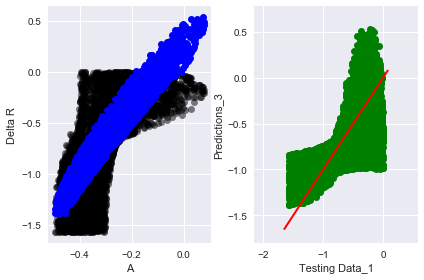

In [79]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X3_test['A'],Y1_test, 'ko', alpha = 0.5)
ax.plot(X3_test['A'], predictions3,'bo')
plt.xlabel('A')
plt.ylabel('Delta R')

ax = pylab.subplot(122)
ax.plot(Y1_test,predictions3, 'go')
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_1')
plt.ylabel('Predictions_3')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.15,xmax+0.7)

i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i] # get y value at specific i 
    predictions3_ys = predictions3 # get ys of all dots/points
    predictions3_ys = predictions3_ys.values # take out the indexing, data types, and names
    predictions3_y = predictions3_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predictions3_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY1 = min(Y1_test_ys)
maxY1 = max(Y1_test_ys)
minp3 = min(predictions3)
maxp3 = max(predictions3)
#print('minY1', minY1, 'maxY1', maxY1)
#print('minp3', minp3, 'maxp3', maxp3)
rangeY1 = minY1 + maxY1
rangep3 = minp3-maxp3
#print('rangeY1', rangeY1)
#print('rangep3', rangep3)
residual_percent_rangep3 = (residual_average/abs(rangep3))*100
print('Residual is this percent of range', round(residual_percent_rangep3[0],3), '%')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_test, predictions3))

In [80]:
#Initialize and fit model for just deltaI using A, phi only
model3_I = sm.OLS(Y2_train,X3_train)
results3_I = model3_I.fit()

predictions3_I = results3_I.predict(X3_test)
results3_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                 1.785e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:56   Log-Likelihood:                -4408.6
No. Observations:               15750   AIC:                             8821.
Df Residuals:                   15748   BIC:                             8836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -1.6291      0.018    -89.079      0.000      -1.665      -1.593
B              0.3374      0.029     11.471      0.000       0.280       0.395
==============================================================================
Omnibus:                     1053.217   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.789
Skew:                          -0.456   Prob(JB):                    1.57e-173
Kurtosis:                       2.382   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The average residual: [0.27113054]
Residual is this percent of range 28.451 %
Variance score: -0.25


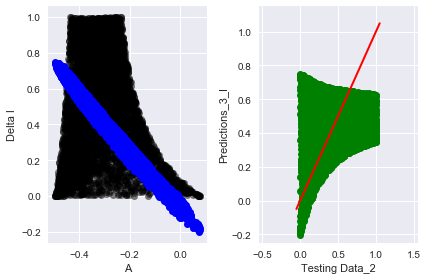

In [81]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X3_test['A'],Y2_test, 'ko', alpha = 0.5)
ax.plot(X3_test['A'], predictions3_I,'bo')
plt.xlabel('A')
plt.ylabel('Delta I')
ax = pylab.subplot(122)
ax.plot(Y2_test,predictions3_I, 'go')
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_2')
plt.ylabel('Predictions_3_I')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.2,xmax+0.1)

i = 0 # resetting i 
iterations = len(Y2_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y2_test_ys = Y2_test # get ys of testing data 
    Y2_test_ys = Y2_test_ys.values # take out indexing, data types, names
    Y2_test_y = Y2_test_ys[i] # get y value at specific i 
    predictions3_I_ys = predictions3_I # get ys of all dots/points
    predictions3_I_ys = predictions3_I_ys.values # take out the indexing, data types, and names
    predictions3_I_y = predictions3_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y2_test_y - predictions3_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY2 = min(Y2_test_ys)
maxY2 = max(Y2_test_ys)
minp3_I = min(predictions3_I)
maxp3_I = max(predictions3_I)
#print('minY2', minY2, 'maxY2', maxY2)
#print('minp3_I', minp3_I, 'maxp3_I', maxp3_I)
rangeY2 = minY2 + maxY2
rangep3_I = minp3_I-maxp3_I
#print('rangeY2', rangeY2)
#print('rangep3_I', rangep3_I)
residual_percent_rangep3_I = (residual_average/abs(rangep3_I))*100
print('Residual is this percent of range', round(residual_percent_rangep3_I[0],3), '%')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, predictions3_I))

In [82]:
#Initialize and fit model for just deltaI using newer dataframe with average peak info
model_new1_I = sm.OLS(Y_new_train['deltaI'],X_new_train)
results_new1_I = model_new1_I.fit()

predictions_new1_I = results_new1_I.predict(X_new_test)
results_new1_I.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deltaI   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3154.
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        16:23:57   Log-Likelihood:                 491.46
No. Observations:                1750   AIC:                            -972.9
Df Residuals:                    1745   BIC:                            -945.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avgA          -0.4931      0.126     -3.917      0.000      -0.740      -0.246
avgB           0.0728      0.164      0.444      0.657      -0.249       0.395
avgPeak       -0.5967      0.104     -5.714      0.000      -0.802      -0.392
avgWidth      -0.0777      0.003    -28.640      0.000      -0.083      -0.072
avgProm        0.3977      0.011     34.634      0.000       0.375       0.420
==============================================================================
Omnibus:                        7.386   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.867
Skew:                           0.037   Prob(JB):                       0.0532
Kurtosis:                       2.726   Cond. No.                     3.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The average residual: 0.139
Residual is this percent of range 13.628 %
Variance score: 0.64


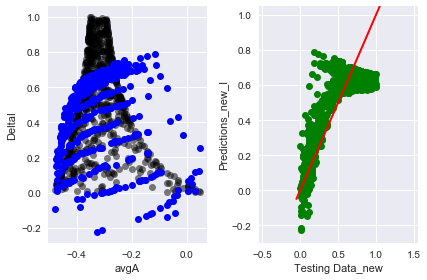

In [83]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X_new_test['avgA'],Y_new_test['deltaI'], 'ko', alpha = 0.5)
ax.plot(X_new_test['avgA'], predictions_new1_I,'bo')
plt.xlabel('avgA')
plt.ylabel('DeltaI')

ax = pylab.subplot(122)
ax.plot(Y_new_test['deltaI'],predictions_new1_I, 'go')
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_new')
plt.ylabel('Predictions_new_I')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax)

i = 0 # resetting i 
iterations = len(Y_new_test['deltaI']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaI'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i] # get y value at specific i 
    predictions_new1_I_ys = predictions_new1_I # get ys of all dots/points
    predictions_new1_I_ys = predictions_new1_I_ys.values # take out the indexing, data types, and names
    predictions_new1_I_y = predictions_new1_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - predictions_new1_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', round(residual_average,3)) # display average of residuals 

minY_new = min(Y_new_test_ys)
maxY_new = max(Y_new_test_ys)
minp_new1_I = min(predictions_new1_I)
maxp_new1_I = max(predictions_new1_I)
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('minp_new1_I', minp_new1_I, 'maxp_new1_I', maxp_new1_I)
rangeY_new = minY_new + maxY_new
rangep_new1_I = minp_new1_I-maxp_new1_I
#print('rangeY_new', rangeY_new)
#print('rangep_new1_I', rangep_new1_I)
residual_percent_rangep_new1_I = (residual_average/abs(rangep_new1_I))*100
print('Residual is this percent of range', round(residual_percent_rangep_new1_I,3), '%')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_new_test['deltaI'], predictions_new1_I))

In [84]:
#Initialize and fit model for just deltaR using newer dataframe with average peak info
model_new1 = sm.OLS(Y_new_train['deltaR'],X_new_train)
results_new1 = model_new1.fit()

predictions_new1 = results_new1.predict(X_new_test)
results_new1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.937    
Dependent Variable: deltaR           AIC:                -273.5713
Date:               2018-05-24 16:23 BIC:                -246.2344
No. Observations:   1750             Log-Likelihood:     141.79   
Df Model:           5                F-statistic:        5184.    
Df Residuals:       1745             Prob (F-statistic): 0.00     
R-squared:          0.937            Scale:              0.049934 
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
avgA           0.7903    0.1537    5.1419  0.0000   0.4889   1.0918
avgB           0.7111    0.2004    3.5491  0.0004   0.3181   1.1041
avgPeak       -2.9225    0.1275  -22.9144  0.0000  -3.1726  -2.6724
avgWidth       0.0005    0.0033    0.1370  0.8911  -0.0060   0.0070
avgProm        0.0270    0.0140    1.9249  0.0544  -0.0005   0.0545
------------------------------------------------------------------
Omnibus:             136.917       Durbin-Watson:          2.004  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       249.790
Skew:                0.545         Prob(JB):               0.000  
Kurtosis:            4.496         Condition No.:          3403   
==================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

The average residual: 0.171
Residual is this percent of range 7.2 %
Variance score: 0.64


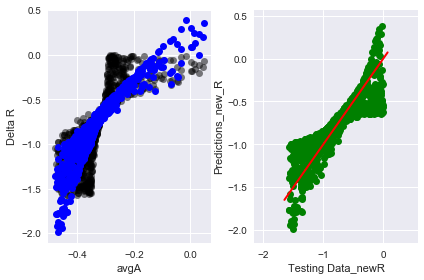

In [85]:

import pylab 
ax = pylab.subplot(121)
ax.plot(X_new_test['avgA'],Y_new_test['deltaR'], 'ko', alpha = 0.5)
ax.plot(X_new_test['avgA'], predictions_new1,'bo')
plt.xlabel('avgA')
plt.ylabel('Delta R')
ax = pylab.subplot(122)
ax.plot(Y_new_test['deltaR'],predictions_new1, 'go')
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_newR')
plt.ylabel('Predictions_new_R')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.5,xmax+0.5)


i = 0 # resetting i 
iterations = len(Y_new_test['deltaR']) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_testR_ys = Y_new_test['deltaR'] # get ys of testing data 
    Y_new_testR_ys = Y_new_testR_ys.values # take out indexing, data types, names
    Y_new_testR_y = Y_new_testR_ys[i] # get y value at specific i 
    predictions_new1_ys = predictions_new1 # get ys of all dots/points
    predictions_new1_ys = predictions_new1_ys.values # take out the indexing, data types, and names
    predictions_new1_y = predictions_new1_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_testR_y - predictions_new1_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', round(residual_average,3)) # display average of residuals 

minY_newR = min(Y_new_testR_ys)
maxY_newR = max(Y_new_testR_ys)
minp_new1 = min(predictions_new1)
maxp_new1 = max(predictions_new1)
#print('minY_newR', minY_newR, 'maxY_newR', maxY_newR)
#print('minp_new1', minp_new1, 'maxp_new1', maxp_new1)
rangeY_newR = minY_newR + maxY_newR
rangep_new1 = minp_new1-maxp_new1
#print('rangeY_newR', rangeY_newR)
#print('rangep_new1', rangep_new1)
residual_percent_rangep_new1 = (residual_average/abs(rangep_new1))*100
print('Residual is this percent of range', round(residual_percent_rangep_new1,3), '%')

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_new_test['deltaI'], predictions_new1_I))

#### Using statsmodels GLM (generalized linear model)

In [86]:
model4 = sm.GLM(Y1_train,X1_train)
results4 = model4.fit()
predictions4 = results4.predict(X1_test)

results4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:              GLM              AIC:            -4940.7837  
Link Function:      identity         BIC:            -151313.6246
Dependent Variable: deltaR           Log-Likelihood: 2494.4      
Date:               2018-05-24 16:23 LL-Null:        -9721.7     
No. Observations:   15750            Deviance:       671.81      
Df Model:           23               Pearson chi2:   672.        
Df Residuals:       15726            Scale:          0.042719    
Method:             IRLS                                         
------------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
------------------------------------------------------------------
A          -2.5357    0.1247  -20.3336  0.0000   -2.7801   -2.2913
B          -5.2744    0.1001  -52.6728  0.0000   -5.4707   -5.0782
E          -0.4775    0.0482   -9.8981  0.0000   -0.5720   -0.3829
k           1.2470    0.0971   12.8405  0.0000    1.0566    1.4373
peak1      -0.1295    0.0134   -9.6988  0.0000   -0.1557   -0.1033
peak2      21.2435    2.4960    8.5110  0.0000   16.3514   26.1356
peak3       5.7753    2.2066    2.6173  0.0089    1.4505   10.1002
peak4     -26.8676    1.7841  -15.0594  0.0000  -30.3643  -23.3708
peak5     -22.2982    1.5978  -13.9560  0.0000  -25.4297  -19.1667
loc1        0.0016    0.0054    0.2955  0.7676   -0.0090    0.0121
loc2       -0.0373    0.0048   -7.6946  0.0000   -0.0468   -0.0278
loc3       -0.0215    0.0048   -4.5228  0.0000   -0.0309   -0.0122
loc4        0.0162    0.0015   11.0028  0.0000    0.0133    0.0191
loc5        0.0021    0.0030    0.7003  0.4837   -0.0037    0.0079
width1      0.0288    0.0096    3.0074  0.0026    0.0100    0.0476
width2      0.1675    0.0283    5.9252  0.0000    0.1121    0.2229
width3      0.0282    0.0178    1.5775  0.1147   -0.0068    0.0631
width4     -0.1633    0.0097  -16.7963  0.0000   -0.1823   -0.1442
width5      0.0327    0.0237    1.3811  0.1672   -0.0137    0.0792
prom1       0.0828    0.0130    6.3646  0.0000    0.0573    0.1083
prom2     -17.7496    1.8826   -9.4283  0.0000  -21.4394  -14.0598
prom3      -3.1224    1.3324   -2.3434  0.0191   -5.7339   -0.5109
prom4      16.2630    1.1227   14.4861  0.0000   14.0626   18.4634
prom5       5.2102    0.8255    6.3118  0.0000    3.5923    6.8282
=================================================================

"""

The average residual: [0.15938498]
Residual is this percent of range 5.054 %
Variance score: 0.78


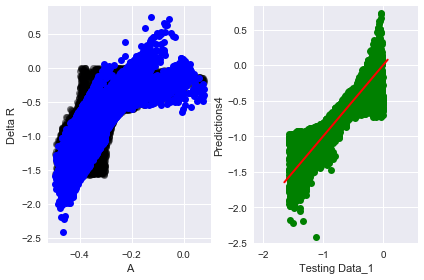

In [87]:
import pylab 
ax = pylab.subplot(121)
ax.plot(X1_test['A'],Y1_test, 'ko', alpha = 0.5)
ax.plot(X1_test['A'], predictions4,'bo')
plt.xlabel('A')
plt.ylabel('Delta R')

ax = pylab.subplot(122)
ax.plot(Y1_test,predictions4, 'go')
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_1')
plt.ylabel('Predictions4')
plt.margins(0.5,1)
plt.tight_layout()
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(-2.5,xmax+0.75)

i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i] # get y value at specific i 
    predictions4_ys = predictions4 # get ys of all dots/points
    predictions4_ys = predictions4_ys.values # take out the indexing, data types, and names
    predictions4_y = predictions4_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predictions4_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY1 = min(Y1_test_ys)
maxY1 = max(Y1_test_ys)
minp4 = min(predictions4)
maxp4 = max(predictions4)
#print('minY1', minY1, 'maxY1', maxY1)
#print('minp4', minp4, 'maxp4', maxp4)
rangeY1 = minY1 + maxY1
rangep4 = minp4-maxp4
#print('rangeY1', rangeY1)
#print('rangep4', rangep4)
residual_percent_rangep4 = (residual_average/abs(rangep4))*100
print('Residual is this percent of range', round(residual_percent_rangep4[0],3), '%')


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_test, predictions4))

The average residual: [0.15594224]
Residual is this percent of range 5.102 %
Variance score: 0.55


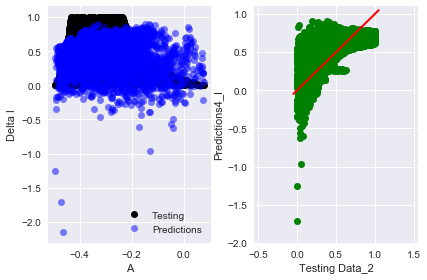

In [88]:
model4_I = sm.GLM(Y2_train,X1_train)
results4_I = model4_I.fit()
predictions4_I = results4_I.predict(X1_test)

results4_I.summary2()

import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X1_test['A'],Y2_test, 'ko', label = 'Testing') # plot the testing data black 
ax.plot(X1_test['A'], predictions4_I,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('A')
plt.ylabel('Delta I')
pylab.legend(loc='lower right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y2_test,predictions4_I, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_2')
plt.ylabel('Predictions4_I')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(-2,xmax+0.05)

i = 0 # resetting i 
iterations = len(Y2_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y2_test_ys = Y2_test # get ys of testing data 
    Y2_test_ys = Y2_test_ys.values # take out indexing, data types, names
    Y2_test_y = Y2_test_ys[i]
    predictions4_I_ys = predictions4_I # get ys of all dots/points
    predictions4_I_ys = predictions4_I_ys.values # take out the indexing, data types, and names
    predictions4_I_y = predictions4_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y2_test_y - predictions4_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY2 = min(Y2_test_ys) # find the minimum y value for testing data 
maxY2 = max(Y2_test_ys) # find the max y value for testing data 
minp4_I = min(predictions4_I) # find the min y value for the prediction data
maxp4_I = max(predictions4_I) # find the max y value for the prediction data 
#print('minY2', minY2, 'maxY2', maxY2)
#print('minp4_I', minp4_I, 'maxp4_I', maxp4_I)
rangeY2 = minY2 + maxY2 # find the range of the testing data
rangep4_I = minp4_I-maxp4_I # find the range of the predictions 
#print('rangeY2', rangeY2)
#print('rangep4_I', rangep4_I)
residual_percent_rangep4_I = (residual_average/abs(rangep4_I))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep4_I[0],3), '%')


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, predictions4_I)) #calculate and display the r squared score 

The average residual: [0.21947773]
Residual is this percent of range 9.175 %
Variance score: 0.60


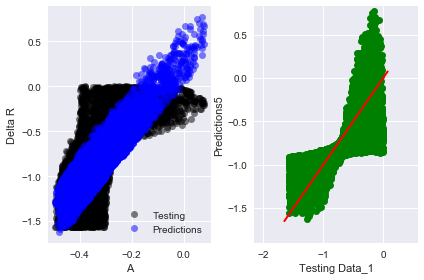

In [89]:
model5 = sm.GLM(Y1_train,X2_train)
results5 = model5.fit()
predictions5 = results5.predict(X2_test)

results5.summary()

import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X2_test['A'],Y1_test, 'ko', alpha = 0.5, label = 'Testing') # plot the testing data black 
ax.plot(X2_test['A'], predictions5,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('A')
plt.ylabel('Delta R')
pylab.legend(loc='lower right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y1_test,predictions5, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_1')
plt.ylabel('Predictions5')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.75)

i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i] # get y value at specific i 
    predictions5_ys = predictions5 # get ys of all dots/points
    predictions5_ys = predictions5_ys.values # take out the indexing, data types, and names
    predictions5_y = predictions5_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predictions5_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY1 = min(Y1_test_ys) # find the minimum y value for testing data 
maxY1 = max(Y1_test_ys) # find the max y value for testing data 
minp5 = min(predictions5) # find the min y value for the prediction data
maxp5 = max(predictions5) # find the max y value for the prediction data 
#print('minY1', minY1, 'maxY1', maxY1)
#print('minp5', minp5, 'maxp5', maxp5)
rangeY1 = minY1 + maxY1 # find the range of the testing data
rangep5 = minp5-maxp5 # find the range of the predictions 
#print('rangeY1', rangeY1)
#print('rangep5', rangep5)
residual_percent_rangep5 = (residual_average/abs(rangep5))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep5[0],3), '%')


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_test, predictions5)) #calculate and display the r squared score 

The average residual: [0.20427675]
Residual is this percent of range 19.749 %
Variance score: 0.23


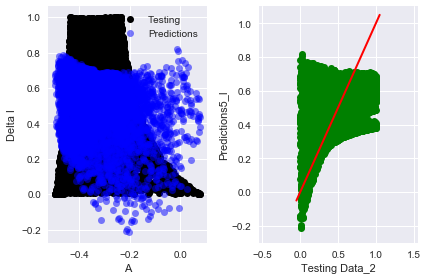

In [107]:
model5_I = sm.GLM(Y2_train,X2_train)
results5_I = model5_I.fit()
predictions5_I = results5_I.predict(X2_test)


#plt.scatter(X2_test['A'],Y2_test, color = 'black', alpha = 0.5)
#plt.scatter(X2_test['A'],predictions5_I)

results5_I.summary2()

import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X2_test['A'],Y2_test, 'ko', label = 'Testing') # plot the testing data black 
ax.plot(X2_test['A'], predictions5_I,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('A')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y2_test,predictions5_I, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_2')
plt.ylabel('Predictions5_I')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)



i = 0 # resetting i 
iterations = len(Y2_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y2_test_ys = Y2_test # get ys of testing data 
    Y2_test_ys = Y2_test_ys.values # take out indexing, data types, names
    Y2_test_y = Y2_test_ys[i]
    predictions5_I_ys = predictions5_I # get ys of all dots/points
    predictions5_I_ys = predictions5_I_ys.values # take out the indexing, data types, and names
    predictions5_I_y = predictions5_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y2_test_y - predictions5_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY2 = min(Y2_test_ys) # find the minimum y value for testing data 
maxY2 = max(Y2_test_ys) # find the max y value for testing data 
minp5_I = min(predictions5_I) # find the min y value for the prediction data
maxp5_I = max(predictions5_I) # find the max y value for the prediction data 
#print('minY2', minY2, 'maxY2', maxY2)
#print('minp5_I', minp5_I, 'maxp5_I', maxp5_I)
rangeY2 = minY2 + maxY2 # find the range of the testing data
rangep5_I = minp5_I-maxp5_I # find the range of the predictions 
#print('rangeY2', rangeY2)
#print('rangep5_I', rangep5_I)
residual_percent_rangep5_I = (residual_average/abs(rangep5_I))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep5_I[0],3), '%')


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, predictions5_I)) #calculate and display the r squared score 

The average residual: [0.24407015]
Residual is this percent of range 12.69 %
Variance score: 0.53


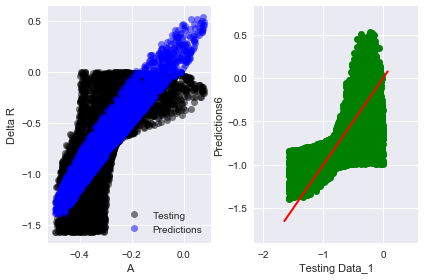

In [91]:
model6 = sm.GLM(Y1_train,X3_train)
results6 = model6.fit()
predictions6 = results6.predict(X3_test)

results6.summary2()

import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X3_test['A'],Y1_test, 'ko', alpha = 0.5, label = 'Testing') # plot the testing data black 
ax.plot(X3_test['A'], predictions6,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('A')
plt.ylabel('Delta R')
pylab.legend(loc='lower right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y1_test,predictions6, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_1')
plt.ylabel('Predictions6')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.75)


i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i] # get y value at specific i 
    predictions6_ys = predictions6 # get ys of all dots/points
    predictions6_ys = predictions6_ys.values # take out the indexing, data types, and names
    predictions6_y = predictions6_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predictions6_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY1 = min(Y1_test_ys) # find the minimum y value for testing data 
maxY1 = max(Y1_test_ys) # find the max y value for testing data 
minp6 = min(predictions6) # find the min y value for the prediction data
maxp6 = max(predictions6) # find the max y value for the prediction data 
#print('minY1', minY1, 'maxY1', maxY1)
#print('minp6', minp6, 'maxp6', maxp6)
rangeY1 = minY1 + maxY1 # find the range of the testing data
rangep6 = minp6-maxp6 # find the range of the predictions 
#print('rangeY1', rangeY1)
#print('rangep6', rangep6)
residual_percent_rangep6 = (residual_average/abs(rangep6))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep6[0],3), '%')


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_test, predictions6)) #calculate and display the r squared score 

The average residual: [0.27113054]
Residual is this percent of range 28.451 %
Variance score: -0.25


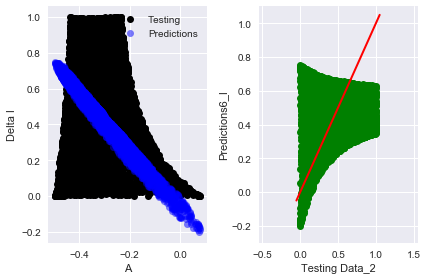

In [92]:
model6_I = sm.GLM(Y2_train,X3_train)
results6_I = model6_I.fit()
predictions6_I = results6_I.predict(X3_test)

results6_I.summary()


import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X3_test['A'],Y2_test, 'ko', label = 'Testing') # plot the testing data black 
ax.plot(X3_test['A'], predictions6_I,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('A')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y2_test,predictions6_I, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_2')
plt.ylabel('Predictions6_I')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)



i = 0 # resetting i 
iterations = len(Y2_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y2_test_ys = Y2_test # get ys of testing data 
    Y2_test_ys = Y2_test_ys.values # take out indexing, data types, names
    Y2_test_y = Y2_test_ys[i]
    predictions6_I_ys = predictions6_I # get ys of all dots/points
    predictions6_I_ys = predictions6_I_ys.values # take out the indexing, data types, and names
    predictions6_I_y = predictions6_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y2_test_y - predictions6_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', residual_average) # display average of residuals 

minY2 = min(Y2_test_ys) # find the minimum y value for testing data 
maxY2 = max(Y2_test_ys) # find the max y value for testing data 
minp6_I = min(predictions6_I) # find the min y value for the prediction data
maxp6_I = max(predictions6_I) # find the max y value for the prediction data 
#print('minY2', minY2, 'maxY2', maxY2)
#print('minp6_I', minp6_I, 'maxp6_I', maxp6_I)
rangeY2 = minY2 + maxY2 # find the range of the testing data
rangep6_I = minp6_I-maxp6_I # find the range of the predictions 
#print('rangeY2', rangeY2)
#print('rangep6_I', rangep6_I)
residual_percent_rangep6_I = (residual_average/abs(rangep6_I))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep6_I[0],3), '%')


# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, predictions6_I)) #calculate and display the r squared score 

The average residual: 0.171
Residual is this percent of range 7.2 %
Variance score: 0.75


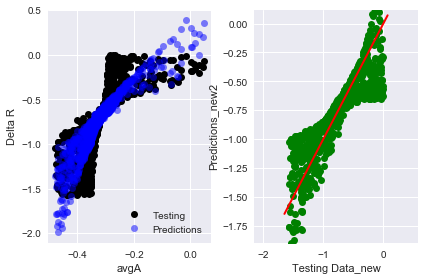

In [93]:
model_new2 = sm.GLM(Y_new_train['deltaR'],X_new_train)
results_new2 = model_new2.fit()
predictions_new2 = results_new2.predict(X_new_test)

results_new2.summary()

import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X_new_test['avgA'],Y_new_test['deltaR'], 'ko', label = 'Testing') # plot the testing data black 
ax.plot(X_new_test['avgA'], predictions_new2,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('avgA')
plt.ylabel('Delta R')
pylab.legend(loc='lower right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y_new_test['deltaR'],predictions_new2, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_new')
plt.ylabel('Predictions_new2')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

i = 0 # resetting i 
iterations = len(Y_new_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaR'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i]
    predictions_new2_ys = predictions_new2 # get ys of all dots/points
    predictions_new2_ys = predictions_new2_ys.values # take out the indexing, data types, and names
    predictions_new2_y = predictions_new2_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - predictions_new2_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', round(residual_average,3)) # display average of residuals 

minY_new = min(Y_new_test_ys) # find the minimum y value for testing data 
maxY_new = max(Y_new_test_ys) # find the max y value for testing data 
minp_new2 = min(predictions_new2) # find the min y value for the prediction data
maxp_new2 = max(predictions_new2) # find the max y value for the prediction data 
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('minp_new2', minp_new2, 'maxp_new2', maxp_new2)
rangeY_new = minY_new + maxY_new # find the range of the testing data
rangep_new2 = minp_new2 -maxp_new2 # find the range of the predictions 
#print('rangeY_new', rangeY_new)
#print('rangep_new2', rangep_new2)
residual_percent_rangep_new2 = (residual_average/abs(rangep_new2))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep_new2,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_new_test['deltaR'], predictions_new2)) #calculate and display the r squared score 

The average residual: 0.139
Residual is this percent of range 13.628 %
Variance score: 0.64


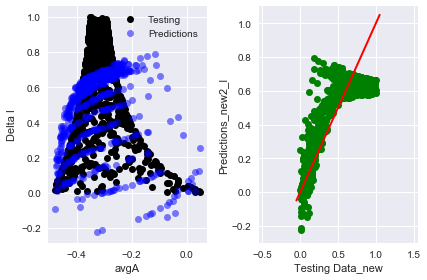

In [94]:
model_new2_I = sm.GLM(Y_new_train['deltaI'],X_new_train)
results_new2_I = model_new2_I.fit()
predictions_new2_I = results_new2_I.predict(X_new_test)


#plt.scatter(X_new_test['avgA'],Y_new_test['deltaI'], color = 'black', alpha = 0.5)
#plt.scatter(X_new_test['avgA'],predictions_new2_I)

results_new2_I.summary()

import pylab 
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(X_new_test['avgA'],Y_new_test['deltaI'], 'ko', label = 'Testing') # plot the testing data black 
ax.plot(X_new_test['avgA'], predictions_new2_I,'bo', alpha = 0.5, label = 'Predictions') # plot the prediction data blue 
plt.xlabel('avgA')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y_new_test['deltaI'],predictions_new2_I, 'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_new')
plt.ylabel('Predictions_new2_I')
plt.margins(0.5,1)
plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

i = 0 # resetting i 
iterations = len(Y_new_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaI'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i]
    predictions_new2_I_ys = predictions_new2_I # get ys of all dots/points
    predictions_new2_I_ys = predictions_new2_I_ys.values # take out the indexing, data types, and names
    predictions_new2_I_y = predictions_new2_I_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - predictions_new2_I_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual:', round(residual_average,3)) # display average of residuals 

minY_new = min(Y_new_test_ys) # find the minimum y value for testing data 
maxY_new = max(Y_new_test_ys) # find the max y value for testing data 
minp_new2_I = min(predictions_new2_I) # find the min y value for the prediction data
maxp_new2_I = max(predictions_new2_I) # find the max y value for the prediction data 
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('minp_new2_I', minp_new2_I, 'maxp_new2_I', maxp_new2_I)
rangeY_new = minY_new + maxY_new # find the range of the testing data
rangep_new2_I = minp_new2_I -maxp_new2_I # find the range of the predictions 
#print('rangeY_new', rangeY_new)
#print('rangep_new2_I', rangep_new2_I)
residual_percent_rangep_new2_I = (residual_average/abs(rangep_new2_I))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of range', round(residual_percent_rangep_new2_I,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_new_test['deltaI'], predictions_new2_I)) #calculate and display the r squared score 

### Using Decision Trees in scikit-learn to predict deltaI and deltaR simultaneously

The average residual for y_1: 0.0361
Residual is this percent of y_1 range 3.665 %
Variance score y_1: 0.9798
 
The average residual for y_2: 0.0208
Residual is this percent of y_2 range 2.092 %
Variance score y_2: 0.993356
 
The average residual for y_3: 0.0209
Residual is this percent of y_3 range 2.1 %
Variance score y_3: 0.993288


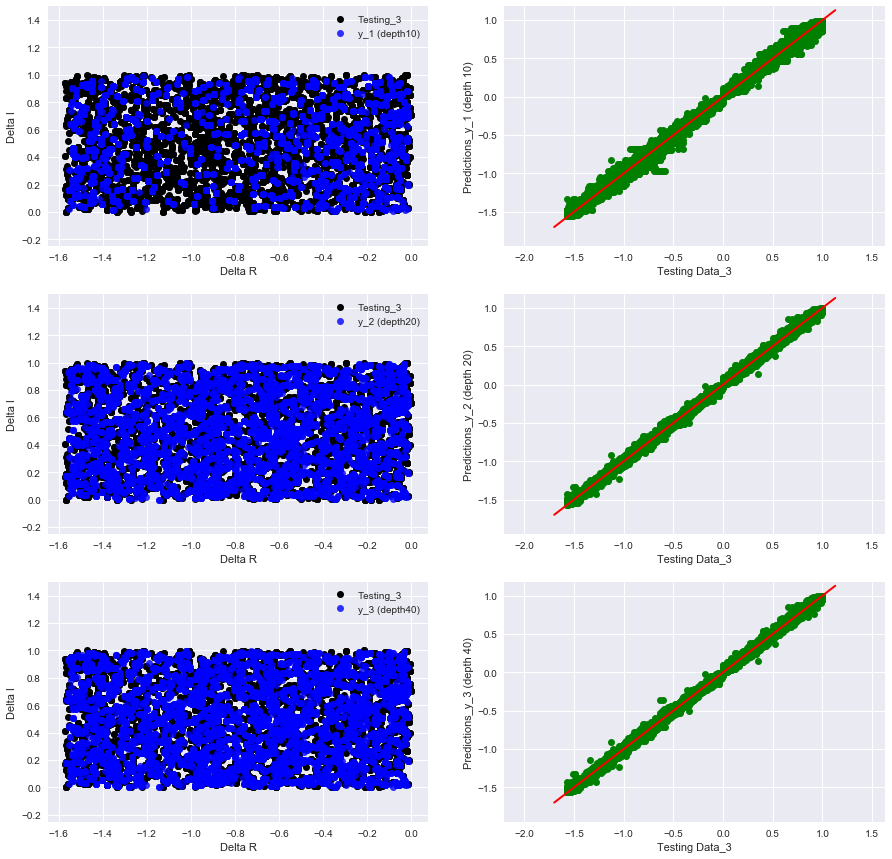

In [95]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
import pylab

#Initialize the models
regr_1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3 = DecisionTreeRegressor(max_depth=40, min_samples_leaf=5)

#Fit the models
regr_1.fit(X1_train, Y3_train)
regr_2.fit(X1_train, Y3_train)
regr_3.fit(X1_train, Y3_train)


#Print the coefficients or importances
#print('Regression 1 Feature Importance:', regr_1.feature_importances_)
#print('Regression 2 Feature Importance:', regr_2.feature_importances_)
#print('Regression 3 Feature Importance:', regr_3.feature_importances_)

#Use model to predict
y_1 = regr_1.predict(X1_test)
y_2 = regr_2.predict(X1_test)
y_3 = regr_3.predict(X1_test)

#Trying to understand the scoring
#print('Regression 1 Score: ', regr_1.score(X1_test,Y3_test), ', using max depth of 10')
#print('Regression 2 Score: ', regr_2.score(X1_test,Y3_test), ', using max depth of 20')
#print('Regression 3 Score: ', regr_3.score(X1_test,Y3_test),', using max depth of 30')

import pylab 
f,(ax) = plt.subplots(figsize=(15,15))
ax = pylab.subplot(321) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_1[:, 0], y_1[:, 1], "bo", label="y_1 (depth10)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(322) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_1,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_1 (depth 10)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

ax = pylab.subplot(323) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_2[:, 0], y_2[:, 1], "bo", label="y_2 (depth20)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(324) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_2,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_2 (depth 20)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)
#plt.subplots_adjust(hspace=3)
#plt.subplots_adjust(wspace=1)

ax = pylab.subplot(325) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_3[:, 0], y_3[:, 1], "bo", label="y_3 (depth40)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(326) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_3,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_3 (depth 40)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)

i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y1_ys = y_1[:,1] # get ys of all dots/points
    #y1_ys = y1_ys.values # take out the indexing, data types, and names
    y1_y = y1_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y1_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_1:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_1 = min(y_1[:,1]) # find the min y value for the prediction data
maxy_1 = max(y_1[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_1', miny_1, 'maxy_1', maxy_1)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_1 = miny_1 -maxy_1 # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_1', rangey_1)
residual_percent_rangey_1 = (residual_average/abs(rangey_1))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_1 range', round(residual_percent_rangey_1,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score y_1: %.4f' % r2_score(Y3_test, y_1)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y2_ys = y_2[:,1] # get ys of all dots/points
    #y1_ys = y1_ys.values # take out the indexing, data types, and names
    y2_y = y2_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y2_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_2:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_2 = min(y_2[:,1]) # find the min y value for the prediction data
maxy_2 = max(y_2[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_2', miny_2, 'maxy_2', maxy_2)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_2 = miny_2 -maxy_2 # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_2', rangey_2)
residual_percent_rangey_2 = (residual_average/abs(rangey_2))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_2 range', round(residual_percent_rangey_2,3), '%')
print('Variance score y_2: %.6f' % r2_score(Y3_test, y_2)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y3_ys = y_3[:,1] # get ys of all dots/points
    y3_ys = y_3[:,1] # get ys of all dots/points
    #y1_ys = y1_ys.values # take out the indexing, data types, and names
    y3_y = y3_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y3_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_3:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_3 = min(y_3[:,1]) # find the min y value for the prediction data
maxy_3 = max(y_3[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_3', miny_3, 'maxy_3', maxy_3)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_3 = miny_3 -maxy_3 # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_3', rangey_3)
residual_percent_rangey_3 = (residual_average/abs(rangey_3))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_3 range', round(residual_percent_rangey_3,3), '%')
print('Variance score y_3: %.6f' % r2_score(Y3_test, y_3)) #calculate and display the r squared score 

The average residual for y_1a: 0.0239
Residual is this percent of y_1a range 1.549 %
Variance score y_1a: 0.9920
 
The average residual for y_2a: 0.0243
Residual is this percent of y_2a range 1.572 %
Variance score y_2a: 0.992050
 
The average residual for y_3a: 0.0243
Residual is this percent of y_3a range 1.575 %
Variance score y_3a: 0.992035


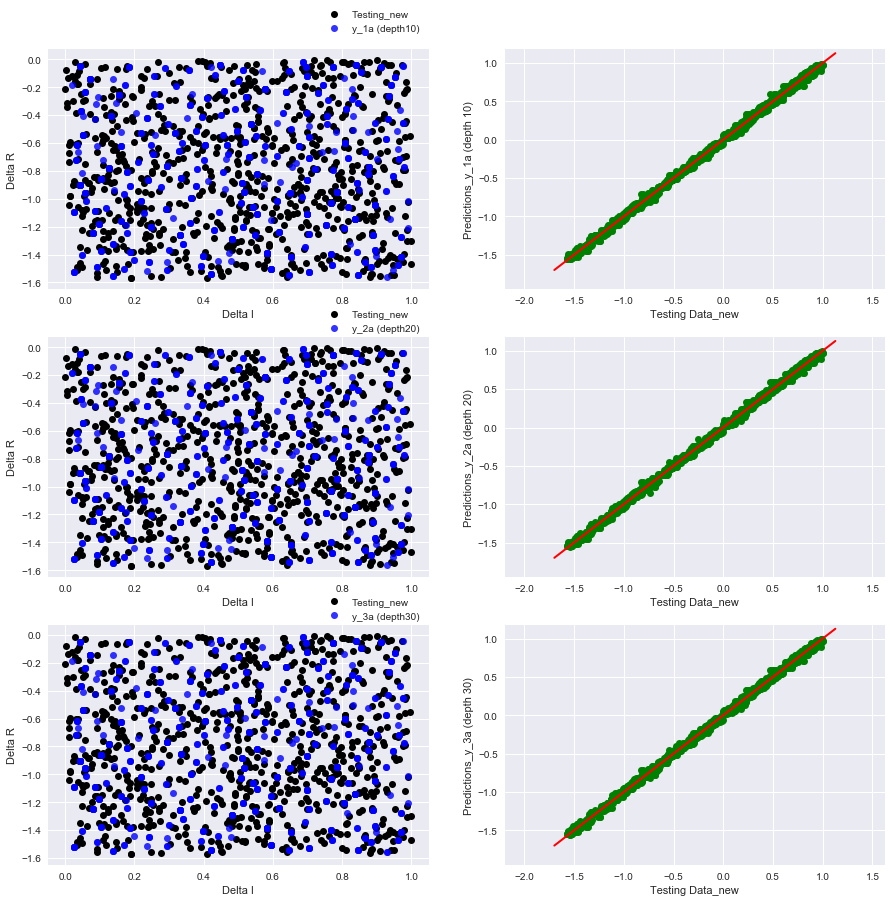

In [119]:
#Decision tree with different X features - average peak info
#Initialize the models
regr_1a = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2a = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3a = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1a.fit(X_new_train, Y_new_train)
regr_2a.fit(X_new_train, Y_new_train)
regr_3a.fit(X_new_train, Y_new_train)


#Print the coefficients or importances
#print('Regression 1a Feature Importance:', regr_1a.feature_importances_)
#print('Regression 2a Feature Importance:', regr_2a.feature_importances_)
#print('Regression 3a Feature Importance:', regr_3a.feature_importances_)

#Use model to predict
y_1a = regr_1a.predict(X_new_test)
y_2a = regr_2a.predict(X_new_test)
y_3a = regr_3a.predict(X_new_test)

import pylab 
f,(ax) = plt.subplots(figsize=(15,15))
ax = pylab.subplot(321) # put the delta graph in the first subplot position 
ax.plot(Y_new_test.iloc[:, 0], Y_new_test.iloc[:, 1], "ko", label="Testing_new") # plot the testing data black 
ax.plot(y_1a[:, 0], y_1a[:, 1], "bo", label="y_1a (depth10)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta I')
plt.ylabel('Delta R')
pylab.legend(loc='upper right', bbox_to_anchor=(1, 1.2))

ax = pylab.subplot(322) # put the testing versus predictions in the second subplot position 
ax.plot(Y_new_test, y_1a,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_new')
plt.ylabel('Predictions_y_1a (depth 10)')
plt.margins(0.5,1)
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

ax = pylab.subplot(323) # put the delta graph in the first subplot position 
ax.plot(Y_new_test.iloc[:, 0], Y_new_test.iloc[:, 1], "ko", label="Testing_new") # plot the testing data black 
ax.plot(y_2a[:, 0], y_2a[:, 1], "bo", label="y_2a (depth20)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta I')
plt.ylabel('Delta R')
pylab.legend(loc='upper right', bbox_to_anchor=(1, 1.15))

ax = pylab.subplot(324) # put the testing versus predictions in the second subplot position 
ax.plot(Y_new_test, y_2a,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_new')
plt.ylabel('Predictions_y_2a (depth 20)')
plt.margins(0.5,1)
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

ax = pylab.subplot(325) # put the delta graph in the first subplot position 
ax.plot(Y_new_test.iloc[:, 0], Y_new_test.iloc[:, 1], "ko", label="Testing_new") # plot the testing data black 
ax.plot(y_3a[:, 0], y_3a[:, 1], "bo", label="y_3a (depth30)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta I')
plt.ylabel('Delta R')
pylab.legend(loc='upper right', bbox_to_anchor=(1, 1.15))

ax = pylab.subplot(326) # put the testing versus predictions in the second subplot position 
ax.plot(Y_new_test, y_3a,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_new')
plt.ylabel('Predictions_y_3a (depth 30)')
plt.margins(0.5,1)
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)

i = 0 # resetting i 
iterations = len(Y_new_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaR'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i]
    y1a_ys = y_1a[:,1] # get ys of all dots/points
    y1a_y = y1a_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - y1a_y # find the difference in height 
    diff = abs(diff) # take the absolute value
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_1a:', round(residual_average,4)) # display average of residuals 

minY_new = min(Y_new_test_ys) # find the minimum y value for testing data 
maxY_new = max(Y_new_test_ys) # find the max y value for testing data 
miny_1a = min(y_1a[:,1]) # find the min y value for the prediction data
maxy_1a = max(y_1a[:,1]) # find the max y value for the prediction data 
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('miny_1a', miny_1a, 'maxy_1a', maxy_1a)
rangeY_new = minY_new + maxY_new # find the range of the testing data
rangey_1a = miny_1a -maxy_1a # find the range of the predictions 
#print('rangeY_new', rangeY_new)
#print('rangey_1a', rangey_1a)
residual_percent_rangey_1a = (residual_average/abs(rangey_1a))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_1a range', round(residual_percent_rangey_1a,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score y_1a: %.4f' % r2_score(Y_new_test, y_1a)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y_new_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaR'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i]
    y2a_ys = y_2a[:,1] # get ys of all dots/points
    y2a_y = y2a_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - y2a_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_2a:', round(residual_average,4)) # display average of residuals 

minY_new = min(Y_new_test_ys) # find the minimum y value for testing data 
maxY_new = max(Y_new_test_ys) # find the max y value for testing data 
miny_2a = min(y_2a[:,1]) # find the min y value for the prediction data
maxy_2a = max(y_2a[:,1]) # find the max y value for the prediction data 
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('miny_new', miny_new, 'maxy_new', maxy_new)
rangeY_new = minY_new + maxY_new # find the range of the testing data
rangey_2a = miny_2a -maxy_2a # find the range of the predictions 
#print('rangeY_new', rangeY_new)
#print('rangey_2a', rangey_2a)
residual_percent_rangey_2a = (residual_average/abs(rangey_2a))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_2a range', round(residual_percent_rangey_2a,3), '%')
print('Variance score y_2a: %.6f' % r2_score(Y_new_test, y_2a)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y_new_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaR'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i]
    y3a_ys = y_3a[:,1] # get ys of all dots/points
    y3a_ys = y_3a[:,1] # get ys of all dots/points
    y3a_y = y3a_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - y3a_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_3a:', round(residual_average,4)) # display average of residuals 

minY_new = min(Y_new_test_ys) # find the minimum y value for testing data 
maxY_new = max(Y_new_test_ys) # find the max y value for testing data 
miny_3a = min(y_3a[:,1]) # find the min y value for the prediction data
maxy_3a = max(y_3a[:,1]) # find the max y value for the prediction data 
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('miny_3a', miny_3a, 'maxy_3a', maxy_3a)
rangeY_new = minY_new + maxY_new # find the range of the testing data
rangey_3a = miny_3a -maxy_3a # find the range of the predictions 
#print('rangeY_new', rangeY_new)
#print('rangey_3a', rangey_3a)
residual_percent_rangey_3a = (residual_average/abs(rangey_3a))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_3a range', round(residual_percent_rangey_3a,3), '%')
print('Variance score y_3a: %.6f' % r2_score(Y_new_test, y_3a)) #calculate and display the r squared score 

#Trying to understand the scoring
#print('Regression 1 Score: ', regr_1a.score(X_new_test,Y_new_test), ', using max depth of 10')
#print('Regression 2 Score: ', regr_2a.score(X_new_test,Y_new_test), ', using max depth of 20')
#print('Regression 3 Score: ', regr_3a.score(X_new_test,Y_new_test),', using max depth of 30')

#regressora = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
#print('Cross Validation Scores: ', cross_val_score(regressora, X_new_df, Y_new_df, cv=10))

The average residual for y_1b: 0.037
Residual is this percent of y_1b range 3.737 %
Variance score y_1b: 0.9796
 
The average residual for y_2b: 0.0218
Residual is this percent of y_2b range 2.207 %
Variance score y_2b: 0.992701
 
The average residual for y_3b: 0.0218
Residual is this percent of y_3b range 2.207 %
Variance score y_3b: 0.992702


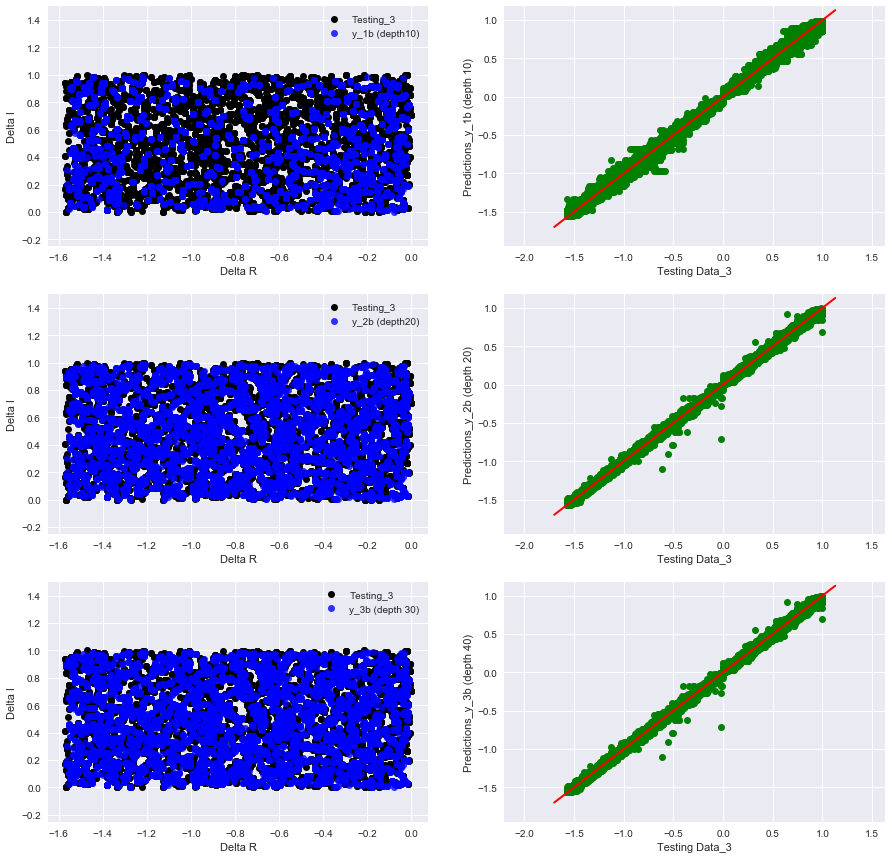

In [97]:
#Decision tree with different X features - no peak info (X2)
#Initialize the models
regr_1b = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2b = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3b = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1b.fit(X2_train, Y3_train)
regr_2b.fit(X2_train, Y3_train)
regr_3b.fit(X2_train, Y3_train)


#Print the coefficients or importances
#print('Regression 1b Feature Importance:', regr_1b.feature_importances_)
#print('Regression 2b Feature Importance:', regr_2b.feature_importances_)
#print('Regression 3b Feature Importance:', regr_3b.feature_importances_)

#Use model to predict
y_1b = regr_1b.predict(X2_test)
y_2b = regr_2b.predict(X2_test)
y_3b = regr_3b.predict(X2_test)

import pylab 
f,(ax) = plt.subplots(figsize=(15,15))
ax = pylab.subplot(321) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_1b[:, 0], y_1b[:, 1], "bo", label="y_1b (depth10)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(322) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_1,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_1b (depth 10)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

ax = pylab.subplot(323) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_2b[:, 0], y_2b[:, 1], "bo", label="y_2b (depth20)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(324) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_2b,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_2b (depth 20)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)
#plt.subplots_adjust(hspace=3)
#plt.subplots_adjust(wspace=1)

ax = pylab.subplot(325) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_3b[:, 0], y_3b[:, 1], "bo", label="y_3b (depth 30)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(326) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_3b,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_3b (depth 40)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)

i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y1b_ys = y_1b[:,1] # get ys of all dots/points
    y1b_y = y1b_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y1b_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_1b:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_1b = min(y_1b[:,1]) # find the min y value for the prediction data
maxy_1b = max(y_1b[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_1b', miny_1b, 'maxy_1b', maxy_1b)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_1b = miny_1b -maxy_1b # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_1b', rangey_1b)
residual_percent_rangey_1b = (residual_average/abs(rangey_1b))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_1b range', round(residual_percent_rangey_1b,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score y_1b: %.4f' % r2_score(Y3_test, y_1b)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y2b_ys = y_2b[:,1] # get ys of all dots/points
    y2b_y = y2b_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y2b_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_2b:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_2b = min(y_2b[:,1]) # find the min y value for the prediction data
maxy_2b = max(y_2b[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_2b', miny_2b, 'maxy_2b', maxy_2b)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_2b = miny_2b -maxy_2b # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_2b', rangey_2b)
residual_percent_rangey_2b = (residual_average/abs(rangey_2b))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_2b range', round(residual_percent_rangey_2b,3), '%')
print('Variance score y_2b: %.6f' % r2_score(Y3_test, y_2b)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y3b_ys = y_3b[:,1] # get ys of all dots/points
    y3b_ys = y_3b[:,1] # get ys of all dots/points
    #y1_ys = y1_ys.values # take out the indexing, data types, and names
    y3b_y = y3b_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y3b_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_3b:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_3b = min(y_3b[:,1]) # find the min y value for the prediction data
maxy_3b = max(y_3b[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_3b', miny_3b, 'maxy_3b', maxy_3b)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_3b = miny_3b -maxy_3b # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_3b', rangey_3b)
residual_percent_rangey_3b = (residual_average/abs(rangey_3b))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_3b range', round(residual_percent_rangey_3b,3), '%')
print('Variance score y_3b: %.6f' % r2_score(Y3_test, y_3b)) #calculate and display the r squared score 

#Trying to understand the scoring
#print('Regression 1 Score: ', regr_1b.score(X2_test,Y3_test), ', using max depth of 10')
#print('Regression 2 Score: ', regr_2b.score(X2_test,Y3_test), ', using max depth of 20')
#print('Regression 3 Score: ', regr_3b.score(X2_test,Y3_test),', using max depth of 30')

#regressorb = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
#print('Cross Validation Scores: ', cross_val_score(regressorb, X2, Y3, cv=10))

The average residual for y_1c: 0.0866
Residual is this percent of y_1c range 8.757 %
Variance score y_1c: 0.8227
 
The average residual for y_2c: 0.0909
Residual is this percent of y_2c range 9.183 %
Variance score y_2c: 0.782829
 
The average residual for y_3c: 0.0909
Residual is this percent of y_3c range 9.185 %
Variance score y_3c: 0.782602


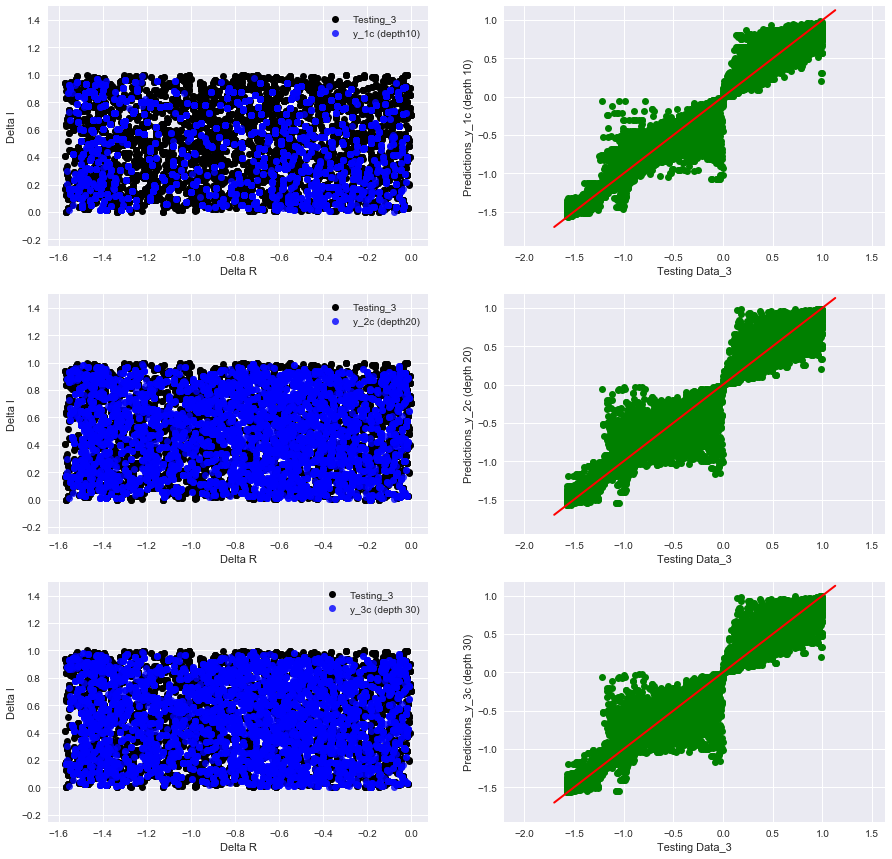

In [98]:
#Decision tree with different X features - just A, phi (X3)
#Initialize the models
regr_1c = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
regr_2c = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
regr_3c = DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)

#Fit the models
regr_1c.fit(X3_train, Y3_train)
regr_2c.fit(X3_train, Y3_train)
regr_3c.fit(X3_train, Y3_train)


#Print the coefficients or importances
#print('Regression 1c Feature Importance:', regr_1c.feature_importances_)
#print('Regression 2c Feature Importance:', regr_2c.feature_importances_)
#print('Regression 3c Feature Importance:', regr_3c.feature_importances_)

#Use model to predict
y_1c = regr_1c.predict(X3_test)
y_2c = regr_2c.predict(X3_test)
y_3c = regr_3c.predict(X3_test)

import pylab 
f,(ax) = plt.subplots(figsize=(15,15))
ax = pylab.subplot(321) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_1c[:, 0], y_1c[:, 1], "bo", label="y_1c (depth10)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(322) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_1c,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_1c (depth 10)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

ax = pylab.subplot(323) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_2c[:, 0], y_2c[:, 1], "bo", label="y_2c (depth20)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(324) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_2c,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_2c (depth 20)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)
#plt.subplots_adjust(hspace=3)
#plt.subplots_adjust(wspace=1)

ax = pylab.subplot(325) # put the delta graph in the first subplot position 
ax.plot(Y3_test.iloc[:, 0], Y3_test.iloc[:, 1], "ko", label="Testing_3") # plot the testing data black 
ax.plot(y_3c[:, 0], y_3c[:, 1], "bo", label="y_3c (depth 30)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right')
ax.set_ylim(-0.25,1.5)

ax = pylab.subplot(326) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, y_3c,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Testing Data_3')
plt.ylabel('Predictions_y_3c (depth 30)')
plt.margins(0.5,1)
#plt.tight_layout() # does not allow axis labels to overlap
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
cross_val_score(regressor, X1, Y3, cv=10)

i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y1c_ys = y_1c[:,1] # get ys of all dots/points
    y1c_y = y1c_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y1c_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_1c:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_1c = min(y_1c[:,1]) # find the min y value for the prediction data
maxy_1c = max(y_1c[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_1c', miny_1c, 'maxy_1c', maxy_1c)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_1c = miny_1c -maxy_1c # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_1c', rangey_1c)
residual_percent_rangey_1c = (residual_average/abs(rangey_1c))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_1c range', round(residual_percent_rangey_1c,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score y_1c: %.4f' % r2_score(Y3_test, y_1c)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y2c_ys = y_2c[:,1] # get ys of all dots/points
    y2c_y = y2c_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y2c_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_2c:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_2c = min(y_2c[:,1]) # find the min y value for the prediction data
maxy_2c = max(y_2c[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_2c', miny_2c, 'maxy_2c', maxy_2c)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_2c = miny_2c -maxy_2c # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_2c', rangey_2c)
residual_percent_rangey_2c = (residual_average/abs(rangey_2c))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_2c range', round(residual_percent_rangey_2c,3), '%')
print('Variance score y_2c: %.6f' % r2_score(Y3_test, y_2c)) #calculate and display the r squared score 
print(' ')
i = 0 # resetting i 
iterations = len(Y3_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y3_test_ys = Y3_test['deltaI'] # get ys of testing data 
    Y3_test_ys = Y3_test_ys.values # take out indexing, data types, names
    Y3_test_y = Y3_test_ys[i]
    y3c_ys = y_3c[:,1] # get ys of all dots/points
    y3c_ys = y_3c[:,1] # get ys of all dots/points
    y3c_y = y3c_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y3_test_y - y3c_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for y_3c:', round(residual_average,4)) # display average of residuals 

minY_3 = min(Y3_test_ys) # find the minimum y value for testing data 
maxY_3 = max(Y3_test_ys) # find the max y value for testing data 
miny_3c = min(y_3c[:,1]) # find the min y value for the prediction data
maxy_3c = max(y_3c[:,1]) # find the max y value for the prediction data 
#print('minY_3', minY_3, 'maxY_3', maxY_3)
#print('miny_3c', miny_3c, 'maxy_3c', maxy_3c)
rangeY_3 = minY_3 + maxY_3 # find the range of the testing data
rangey_3c = miny_3c -maxy_3c # find the range of the predictions 
#print('rangeY_3', rangeY_3)
#print('rangey_3c', rangey_3c)
residual_percent_rangey_3c = (residual_average/abs(rangey_3c))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of y_3c range', round(residual_percent_rangey_3c,3), '%')
print('Variance score y_3c: %.6f' % r2_score(Y3_test, y_3c)) #calculate and display the r squared score 

#Trying to understand the scoring
#print('Regression 1c Score: ', regr_1c.score(X3_test,Y3_test), ', using max depth of 10')
#print('Regression 2c Score: ', regr_2c.score(X3_test,Y3_test), ', using max depth of 20')
#print('Regression 3c Score: ', regr_3c.score(X3_test,Y3_test),', using max depth of 30')

#regressorc = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
#print('Cross Validation Scores 3c: ', cross_val_score(regressorc, X3, Y3, cv=10))

In [99]:
#Visualize a Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regr_1c, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X3_test.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(path = 'treeTest1.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Random Forest

One way to improve the effectiveness of decision trees and reduce the risk of overfitting, is to implement a random forest, where there are several decision trees and certain nodes within are randomly removed to avoid having one node affect the results too much. Could also use bagging to avoid overfitting. 


From the scikit-learn page for RandomForestRegressor:
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [153]:
from sklearn.ensemble import RandomForestRegressor
rs = 42
regr_rf = RandomForestRegressor(max_depth = 6,  random_state=rs)
regr_rf.fit(X1_train, Y3_train)

print('Score: ', regr_rf.score(X1_test, Y3_test))
predict = pd.DataFrame(regr_rf.predict(X1_test), columns = ['deltaI', 'deltaR'])

Score:  0.9398492972976327


The average residual for predict: 0.0724
Residual is this percent of predict range 4.999 %
Variance score predict1: 0.9304
 


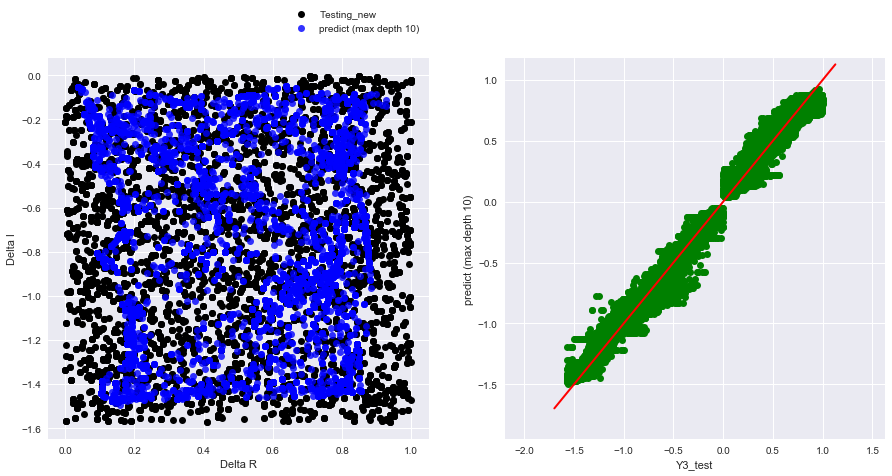

In [154]:
#pd.Series(regr_rf.feature_importances_, index= X1_train.columns)
predict = pd.DataFrame(regr_rf.predict(X1_test), columns = ['deltaI', 'deltaR'])

import pylab 
f,(ax) = plt.subplots(figsize=(15,7))
## Plot row 1  
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(Y2_test, Y1_test, "ko", label="Testing_new") # plot the testing data black 
ax.plot(predict['deltaR'], predict['deltaI'], "bo", label="predict (max depth 10)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right', bbox_to_anchor=(1, 1.15))

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y3_test, predict,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Y3_test')
plt.ylabel('predict (max depth 10)')
plt.margins(0.5,1)
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

## residuals 1 
i = 0 # resetting i 
iterations = len(Y1_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y1_test_ys = Y1_test # get ys of testing data 
    Y1_test_ys = Y1_test_ys.values # take out indexing, data types, names
    Y1_test_y = Y1_test_ys[i]
    predict_ys = predict['deltaI'] # get ys of all dots/points
    predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y1_test_y - predict_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for predict:', round(residual_average[0],4)) # display average of residuals 

minY1 = min(Y1_test_ys) # find the minimum y value for testing data 
maxY1 = max(Y1_test_ys) # find the max y value for testing data 
minpredict = min(predict['deltaI']) # find the min y value for the prediction data
maxpredict = max(predict['deltaI']) # find the max y value for the prediction data 
#print('minY1', minY1, 'maxY1', maxY1)
#print('minpredict', minpredict, 'maxpredict', maxpredict)
rangeY1 = minY1 + maxY1 # find the range of the testing data
rangepredict = minpredict -maxpredict # find the range of the predictions 
#print('rangeY1', rangeY1)
#print('rangepredict', rangepredict)
residual_percent_rangepredict = (residual_average[0]/abs(rangepredict))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score predict1: %.4f' % r2_score(Y3_test, predict)) #calculate and display the r squared score 
print(' ')



Score:  0.9980010967406436
The average residual for predict1: 0.0103
Residual is this percent of predict1 range 1.056 %
Variance score predict1: 0.9978
 


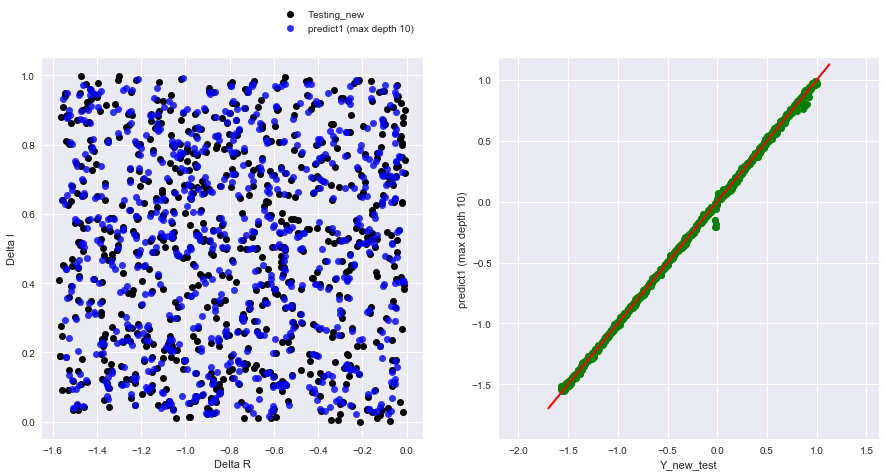

In [136]:
#Trying with a different dataset - average peak info

regr_rf1 = RandomForestRegressor(max_depth = 10, random_state = rs)
regr_rf1 = regr_rf1.fit(X_new_train, Y_new_train)

print('Score: ', regr_rf1.score(X_new_test, Y_new_test)) #R^2 score 

predict1 = pd.DataFrame(regr_rf1.predict(X_new_test), columns = ['deltaI', 'deltaR'])


################################# PLOTTING ###########################################
import pylab 
f,(ax) = plt.subplots(figsize=(15,7))
## Plot row 1  
ax = pylab.subplot(121) # put the delta graph in the first subplot position 
ax.plot(Y_new_test['deltaR'], Y_new_test['deltaI'], "ko", label="Testing_new") # plot the testing data black 
ax.plot(predict1['deltaR'], predict1['deltaI'], "bo", label="predict1 (max depth 10)", alpha = 0.8) # plot the prediction data blue 
plt.xlabel('Delta R')
plt.ylabel('Delta I')
pylab.legend(loc='upper right', bbox_to_anchor=(1, 1.15))

ax = pylab.subplot(122) # put the testing versus predictions in the second subplot position 
ax.plot(Y_new_test, predict1,'go') # plot the testing versus predictions in green 
xmin, xmax = plt.xlim()
plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one
plt.xlabel('Y_new_test')
plt.ylabel('predict1 (max depth 10)')
plt.margins(0.5,1)
ax.set_xlim(xmin-0.5,xmax+0.5)
ax.set_ylim(xmin-0.25,xmax+0.05)

## residuals 1 
i = 0 # resetting i 
iterations = len(Y_new_test) # gets number of dots/points
residual_sum = 0 # initializes sum of residuals
for i in range (0,iterations): # for every dot/point
    Y_new_test_ys = Y_new_test['deltaI'] # get ys of testing data 
    Y_new_test_ys = Y_new_test_ys.values # take out indexing, data types, names
    Y_new_test_y = Y_new_test_ys[i]
    predict1_ys = predict1['deltaI'] # get ys of all dots/points
    predict1_y = predict1_ys[i] # get the y value of the dot/point at specfic x value i
    diff = Y_new_test_y - predict1_y # find the difference in height 
    diff = abs(diff) # take the absolute value 
    residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
residual_average = residual_sum/iterations # find the average of the residuals 
print('The average residual for predict1:', round(residual_average,4)) # display average of residuals 

minY_new = min(Y_new_test_ys) # find the minimum y value for testing data 
maxY_new = max(Y_new_test_ys) # find the max y value for testing data 
minpredict1 = min(predict1['deltaI']) # find the min y value for the prediction data
maxpredict1 = max(predict1['deltaI']) # find the max y value for the prediction data 
#print('minY_new', minY_new, 'maxY_new', maxY_new)
#print('minpredict1', minpredict1, 'maxpredict1', maxpredict1)
rangeY_new = minY_new + maxY_new # find the range of the testing data
rangepredict1 = minpredict1 -maxpredict1 # find the range of the predictions 
#print('rangeY_new', rangeY_new)
#print('rangepredict1', rangepredict1)
residual_percent_rangepredict1 = (residual_average/abs(rangepredict1))*100 # calculate what percent the residual is of the range 
print('Residual is this percent of predict1 range', round(residual_percent_rangepredict1,3), '%')
#Explained variance score: 1 is perfect prediction
print('Variance score predict1: %.4f' % r2_score(Y_new_test, predict1)) #calculate and display the r squared score 
print(' ')


In [105]:
pd.Series(regr_rf1.feature_importances_, index= X_new_train.columns)


avgA        0.630507
avgB        0.040876
avgPeak     0.082885
avgWidth    0.119305
avgProm     0.126427
dtype: float64

In [106]:
#Save images of each decision tree in the forest
import six
#from sklearn import tree

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in regr_rf1.estimators_:
    if (i_tree <= len(regr_rf1.estimators_)):        
        export_graphviz(tree_in_forest, out_file=dotfile, feature_names=X_new_train.columns)
        (pydotplus.graph_from_dot_data(dotfile.getvalue())).write_png('dtree_depth6_'+ str(i_tree) +'.png')
        dotfile = six.StringIO()
        i_tree = i_tree + 1

NameError: name 'pydotplus' is not defined

In [157]:
def myResiduals(testY, predictY):
    ## residuals 1 
    i = 0 # resetting i 
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
        ys = testY # get ys of testing data 
        ys = ys.values # take out indexing, data types, names
        y = ys[i]
        predict_ys = predictY # get ys of all dots/points
        predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
        diff = y - predict_y # find the difference in height 
        diff = abs(diff) # take the absolute value 
        residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals 
    residual_average = residual_sum/iterations # find the average of the residuals 
    print('The average residual for predict:', round(residual_average[0],4)) # display average of residuals 

    minY = min(ys) # find the minimum y value for testing data 
    maxY = max(ys) # find the max y value for testing data 
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data 
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions 
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average[0]/abs(rangepredict))*100 # calculate what percent the residual is of the range 
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    #Explained variance score: 1 is perfect prediction

The average residual for predict: 0.0724
Residual is this percent of predict range 4.999 %
